# Data Exploration

In [2]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
# read in clean_data from data_cleaning.ipynb
%store -r clean_data

In [4]:
# check if clean_data loaded in correctly
clean_data.head()

Surface area (km2)  Population in thousands (2017)  \
0            652864.0                           35530   
1             28748.0                            2930   
2           2381741.0                           41318   
4               468.0                              77   
5           1246700.0                           29784   

   Population density (per km2, 2017)  Sex ratio (m per 100 f, 2017)  \
0                                54.4                          106.3   
1                               106.9                          101.9   
2                                17.3                          102.0   
4                               163.8                          102.3   
5                                23.9                           96.2   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
4                                               2812   
5                                             117955   

   GDP growth rate (annual %, const. 2005 prices)  \
0                                            -2.4   
1                                             2.6   
2                                             3.8   
4                                             0.8   
5                                             3.0   

   GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                         623.2                             23.3   
1                        3984.2                             22.4   
2                        4154.1                             12.2   
4                       39896.4                              0.5   
5                        4714.1                              6.8   

   Economy: Industry (% of GVA)  \
0                          23.3   
1                          26.0   
2                          37.3   
4                          10.8   
5                          51.2   

   Economy: Services and other activity (% of GVA)  ...  \
0                                             53.3  ...   
1                                             51.7  ...   
2                                             50.5  ...   
4                                             88.6  ...   
5                                             42.0  ...   

   Population age distribution (0-14 / 60+ years, %)-60+ years  \
0                                                4.1             
1                                               19.0             
2                                                9.4             
4                                               19.0             
5                                                4.0             

   International migrant stock (000/% of total pop.)-in thousands  \
0                                              382.4                
1                                               57.6                
2                                              242.4                
4                                               42.1                
5                                              106.8                

   International migrant stock (000/% of total pop.)-as % of total pop  \
0                                                1.2                     
1                                                2.0                     
2                                                0.6                     
4                                               59.7                     
5                                                0.4                     

   CO2 emission estimates (million tons/tons per capita)-million tons  \
0                                                9.8                    
1                                                5.7                    
2                                              145.4                    
4                                              

***Data preperation***  
Currently we have 47 columns where some are unneccesary hence we aim to remove certain columns through further exploration of the different columns via correlation and EDA to reduce dimensionality. This will allow us to keep the most vital columns in determining underdeveloped countries.  
    
***Reducing columns***  
1. Through correlation by finding highly correlated columns and only keeping one (we will create two different dataframes one with all the correlated columns and one without, this will allow us to see which dataframe is better through PDA)  
2. Grouping columns by those that are indicative of similar factors such as economy and health. Then we will take the most optimal indicators
3. Combining columns to create a new column that provide an average


***Correlation matrix***  
Some columns will have extremely high correlation. So from here we will drop the redundant columns.

<AxesSubplot:>

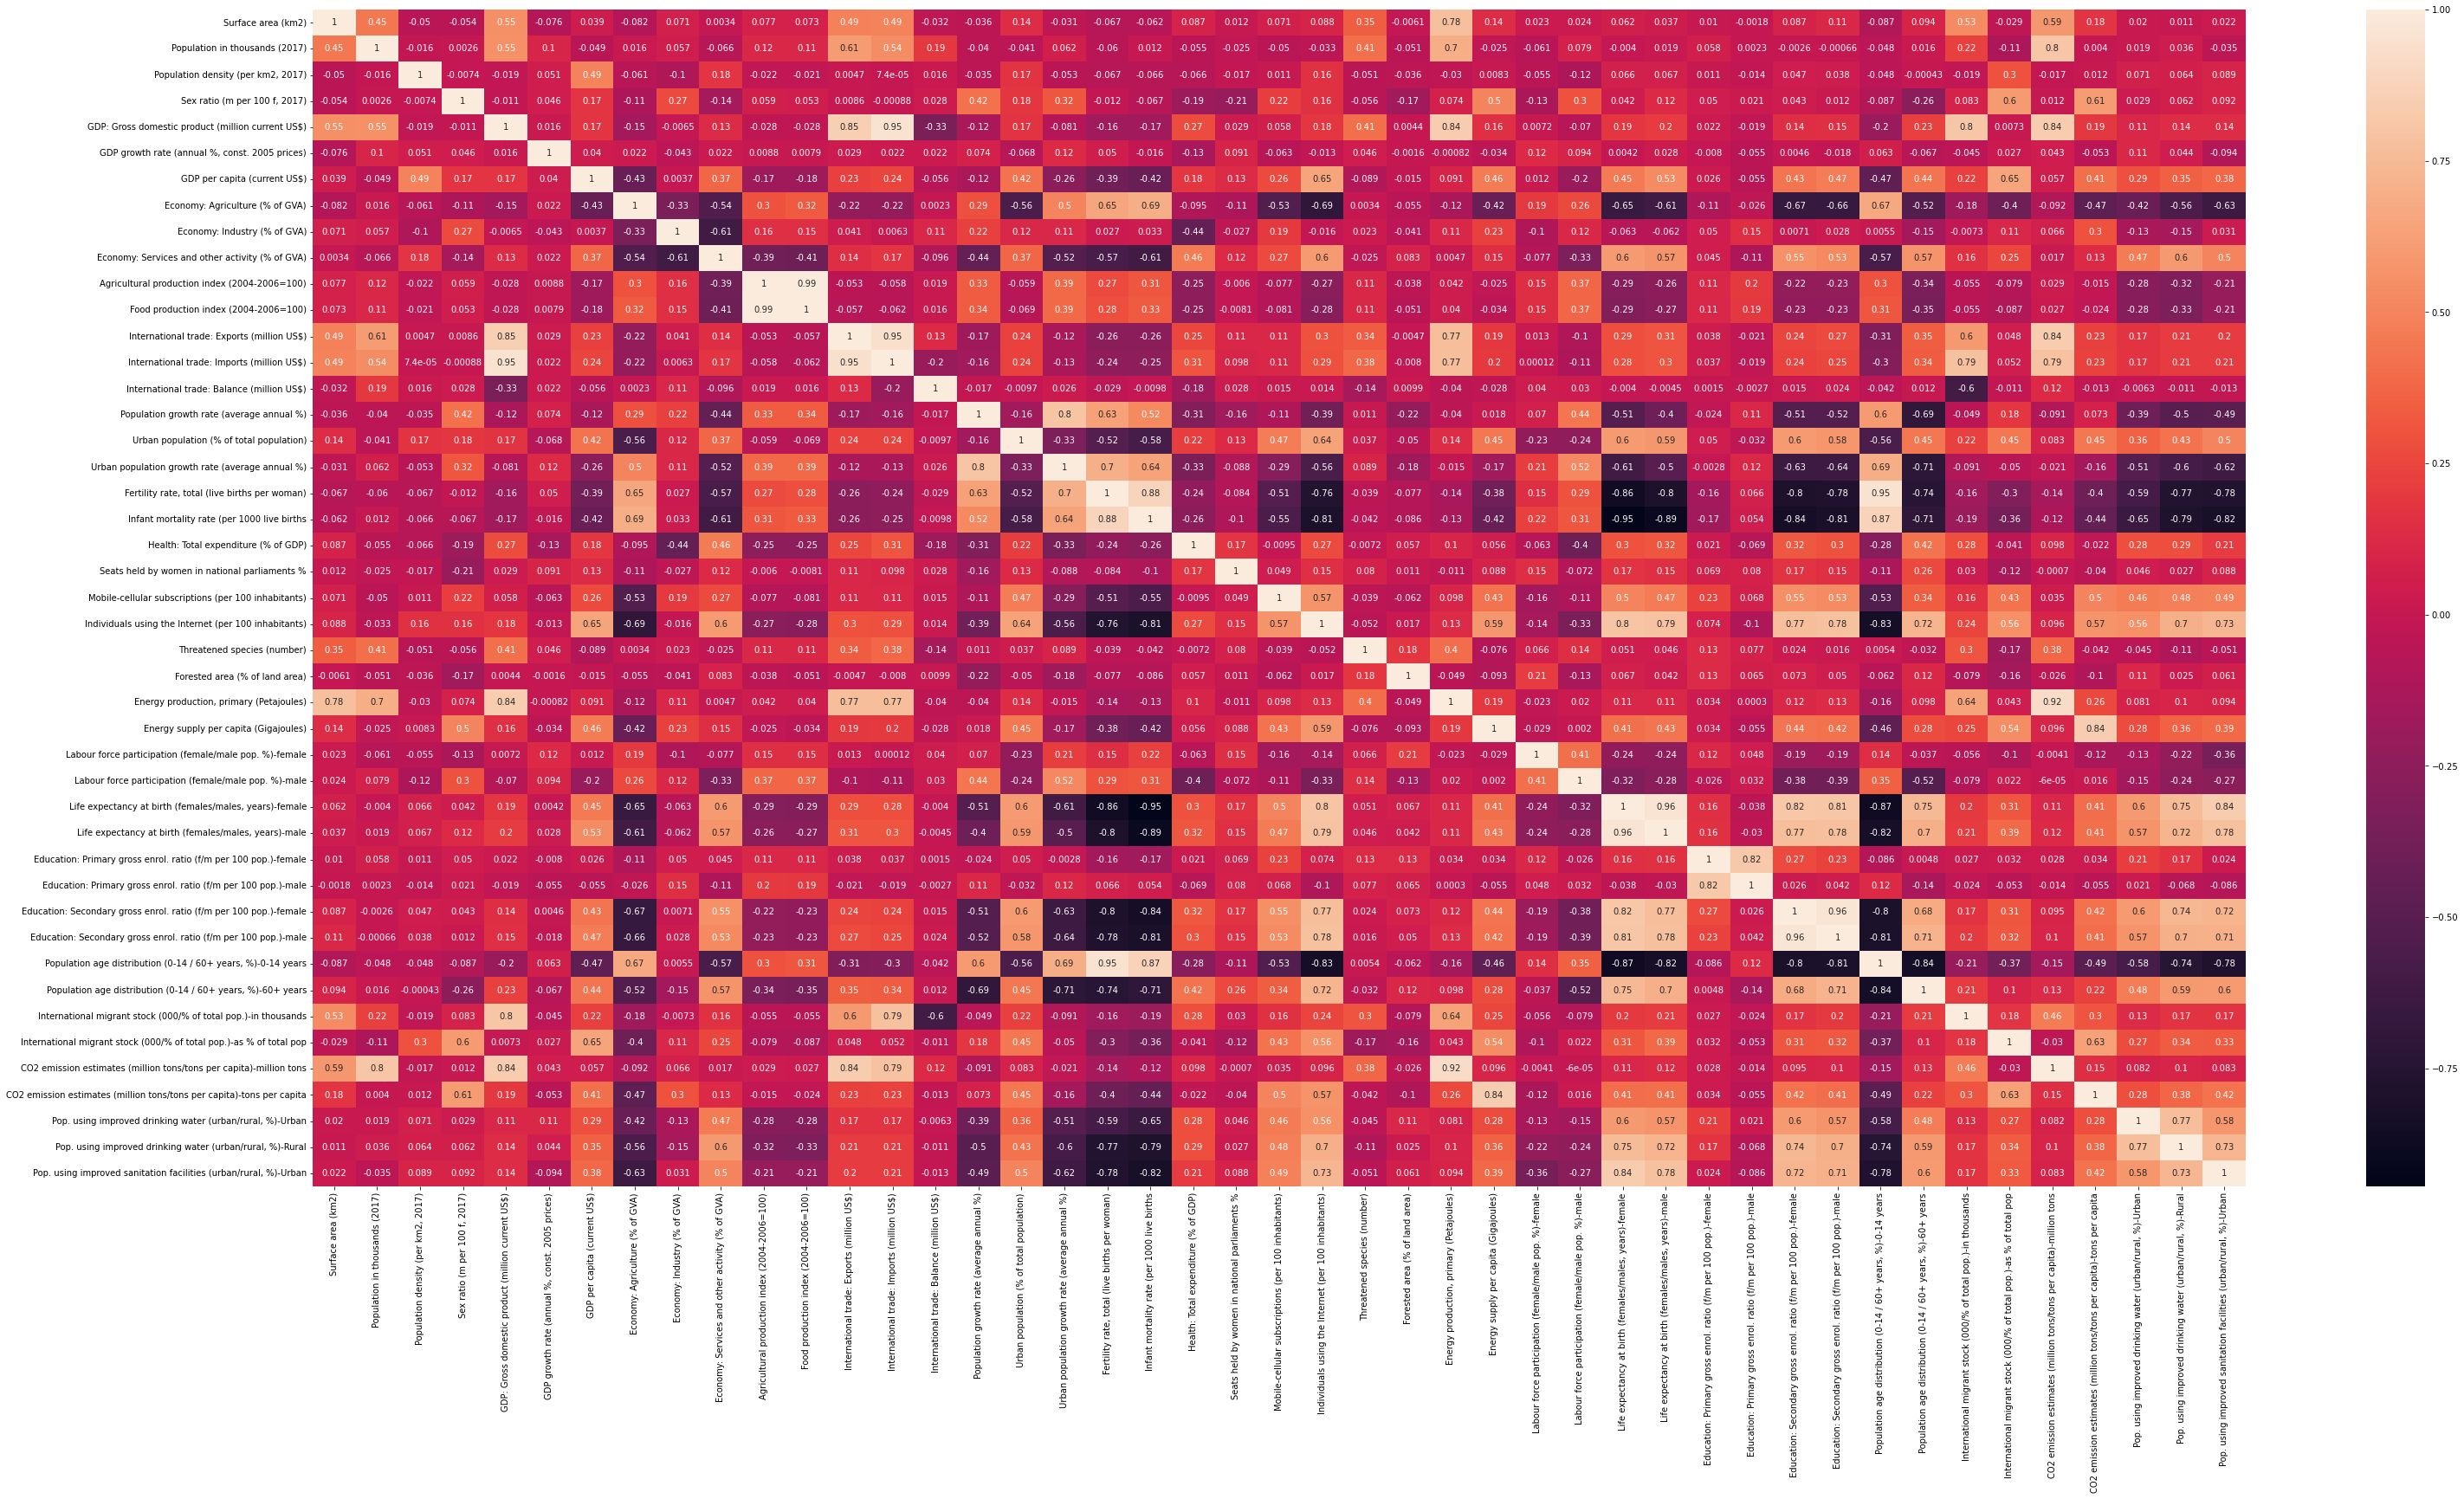

In [5]:
# correlation matrix
# Calculate the correlation between the different columns
plt.figure(figsize=(50,25))
sb.heatmap(clean_data.corr(method='pearson', min_periods=1),annot=True)

In [6]:
# Create correlation matrix

corr_matrix = clean_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] >= 0.7)] #creating a list of all the columns that are gonna be dropped
count=1
print("Colums with a correlation coefficient: 0.7 and more ") 
print()
for i in to_drop: #printing all the elements that are gonna be dropped
   print(count, end='') 
   print(")",end=" ")
   print(i)
   print()
   count+=1

Colums with a correlation coefficient: 0.7 and more 

1) Food production index (2004-2006=100)

2) International trade: Exports (million US$)

3) International trade: Imports (million US$)

4) Urban population growth rate (average annual %)

5) Fertility rate, total (live births per woman)

6) Infant mortality rate (per 1000 live births

7) Individuals using the Internet (per 100 inhabitants)

8) Energy production, primary (Petajoules)

9) Life expectancy at birth (females/males, years)-female

10) Life expectancy at birth (females/males, years)-male

11) Education: Primary gross enrol. ratio (f/m per 100 pop.)-male

12) Education: Secondary gross enrol. ratio (f/m per 100 pop.)-female

13) Education: Secondary gross enrol. ratio (f/m per 100 pop.)-male

14) Population age distribution (0-14 / 60+ years, %)-0-14 years

15) Population age distribution (0-14 / 60+ years, %)-60+ years

16) International migrant stock (000/% of total pop.)-in thousands

17) CO2 emission estimates (million 

***Clearer visualisation***  
The correlation matrix above is too packed hence failing to provide a clear visualisation therefore we created a graph below to show close the columns are correlated. 

5


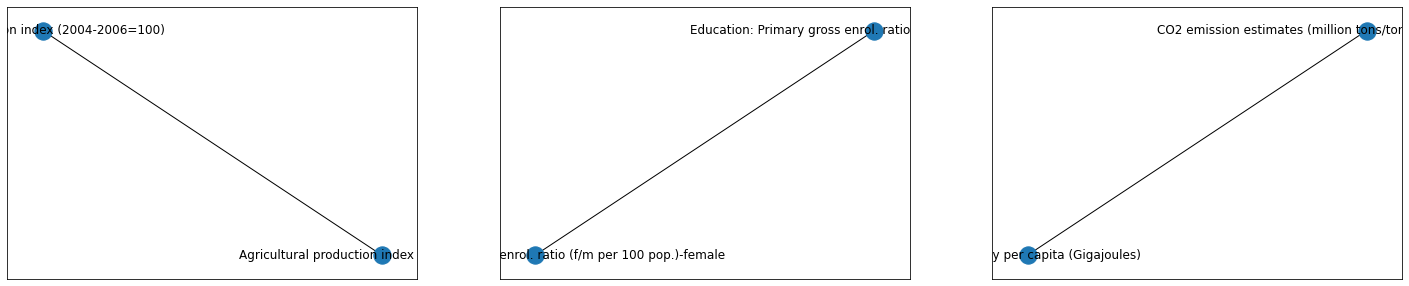

In [7]:
# Create correlation matrix

corr_matrix = clean_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
nodes = []
edges = []
G = nx.Graph()
for col in upper.columns:
    for index in range(0, len(upper[col])):
        if upper[col][index] >= 0.7:
            otherCol = upper.index.values[index]
            if col not in nodes:
                nodes.append(col)
            edge =  tuple([col, otherCol])
            if edge not in edges:
               edges.append(edge)

G.add_nodes_from(nodes)
G.add_edges_from(edges)
fig, ax = plt.subplots(1,3, figsize=(25,5))
subgraphs = [G.subgraph(c).copy() for c in sorted(nx.connected_components(G), key=len)]
print(len(subgraphs))

nx.draw_networkx(subgraphs[0], ax=ax[0])
nx.draw_networkx(subgraphs[1], ax=ax[1])
nx.draw_networkx(subgraphs[2], ax=ax[2])
plt.show()


# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50


# plt.show()

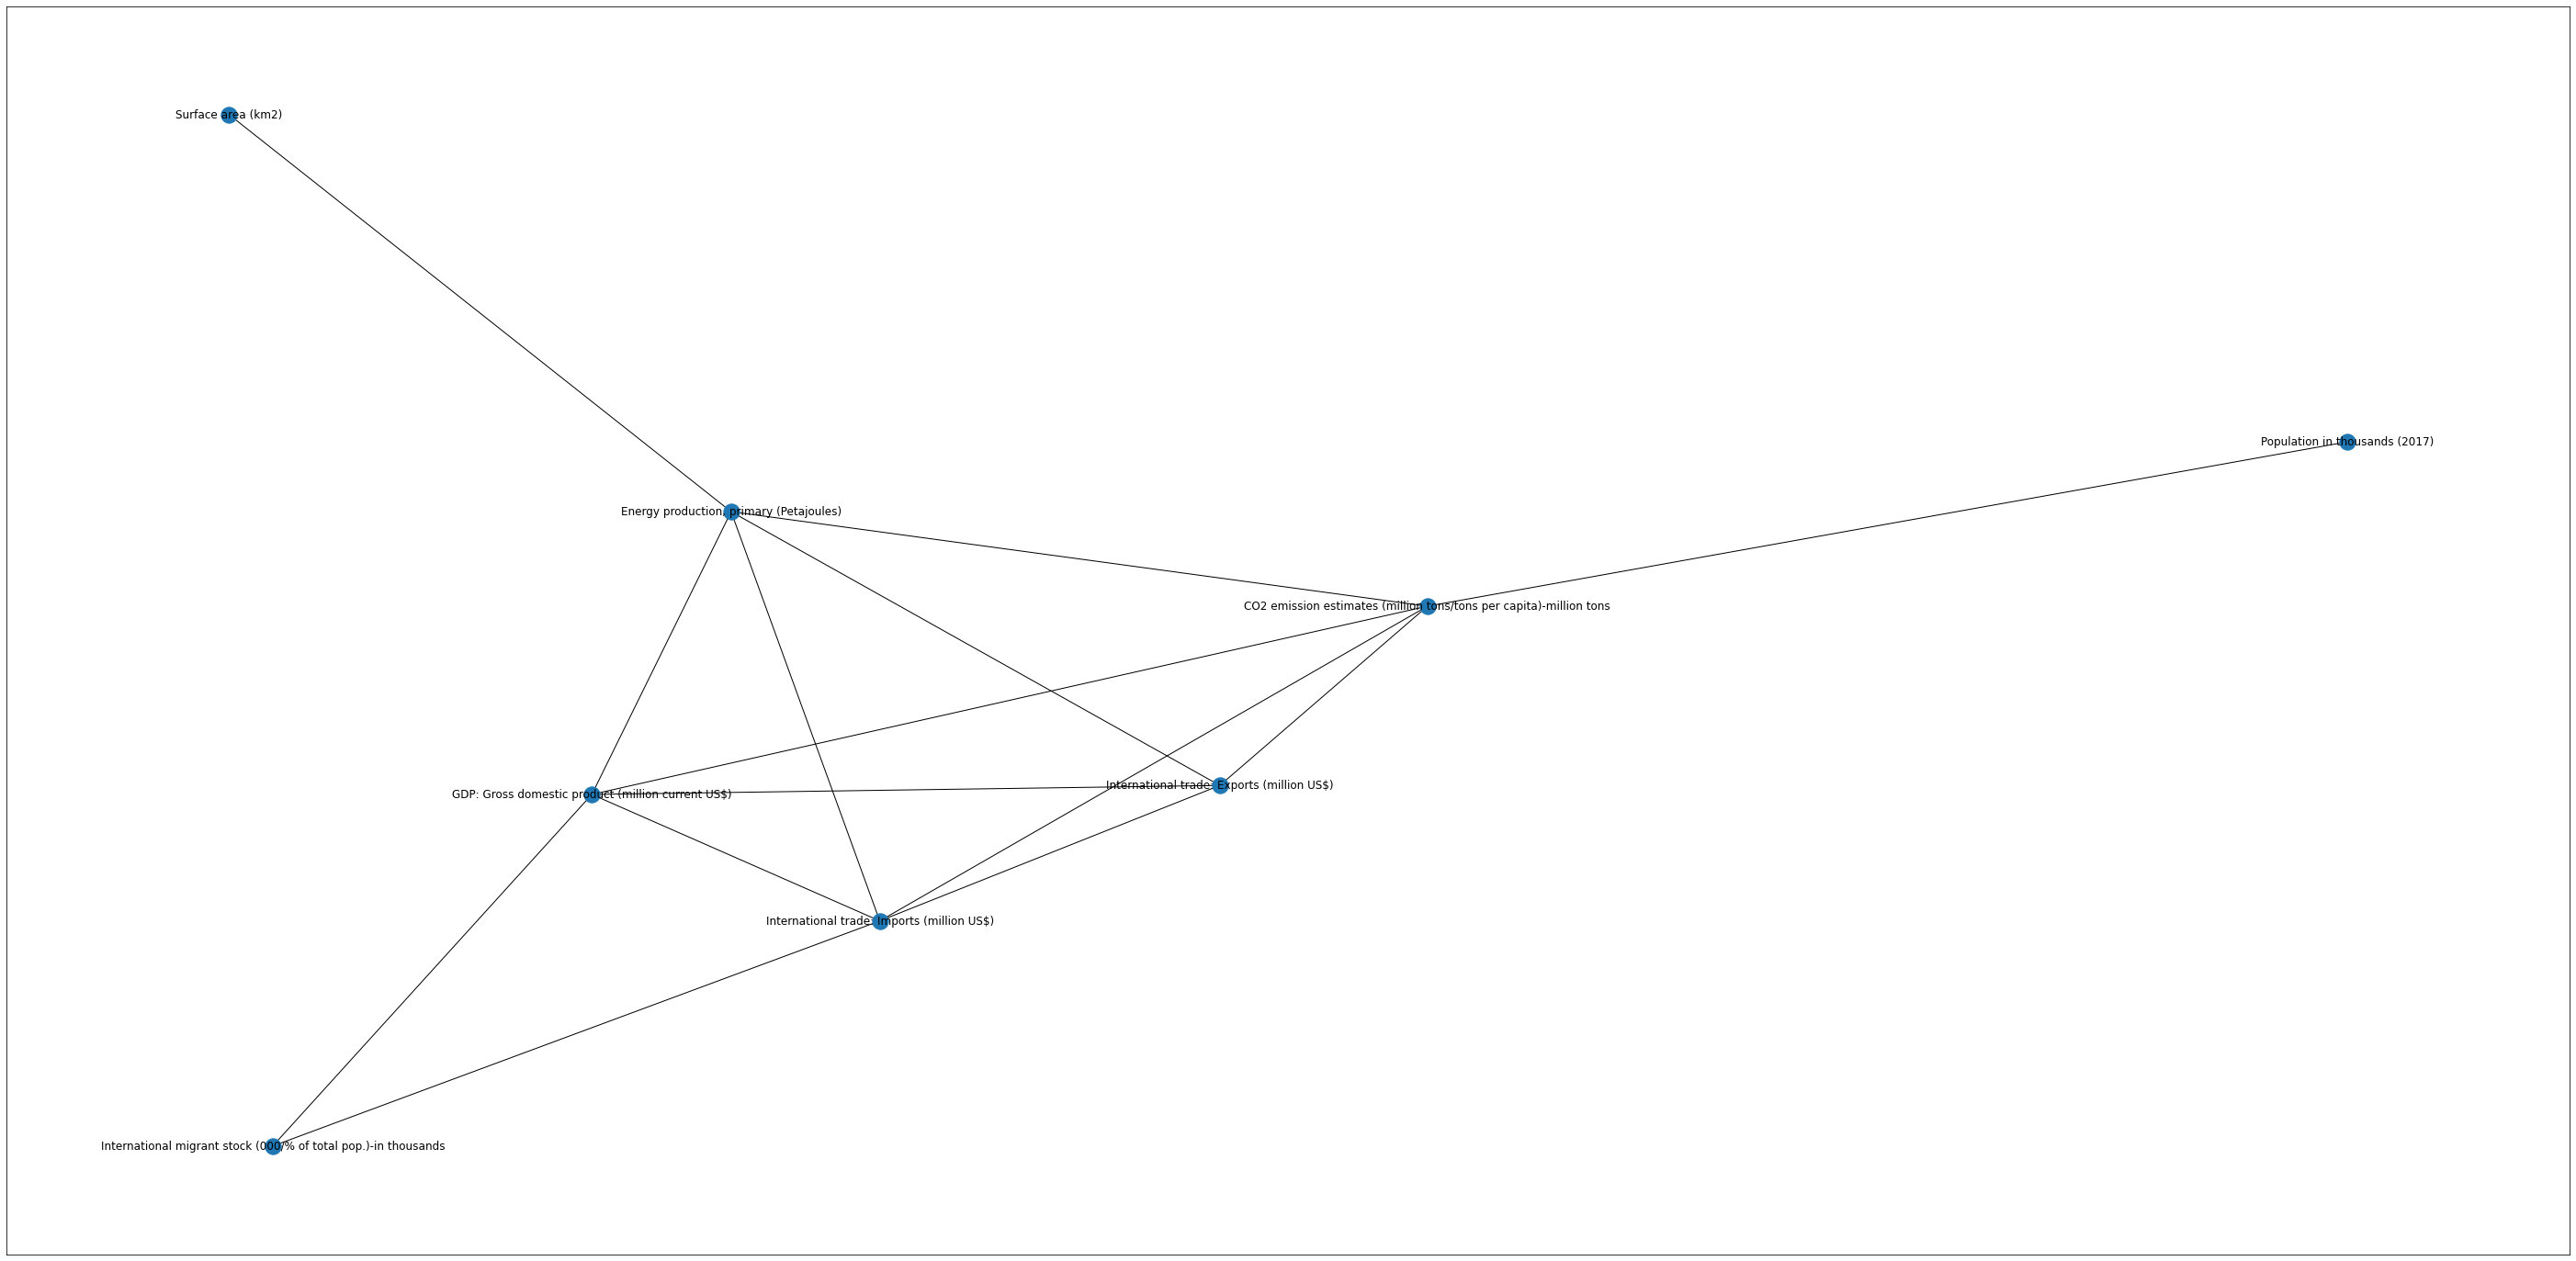

In [8]:
plt.figure(figsize=(50,25))
nx.draw_networkx(subgraphs[3])
plt.show()

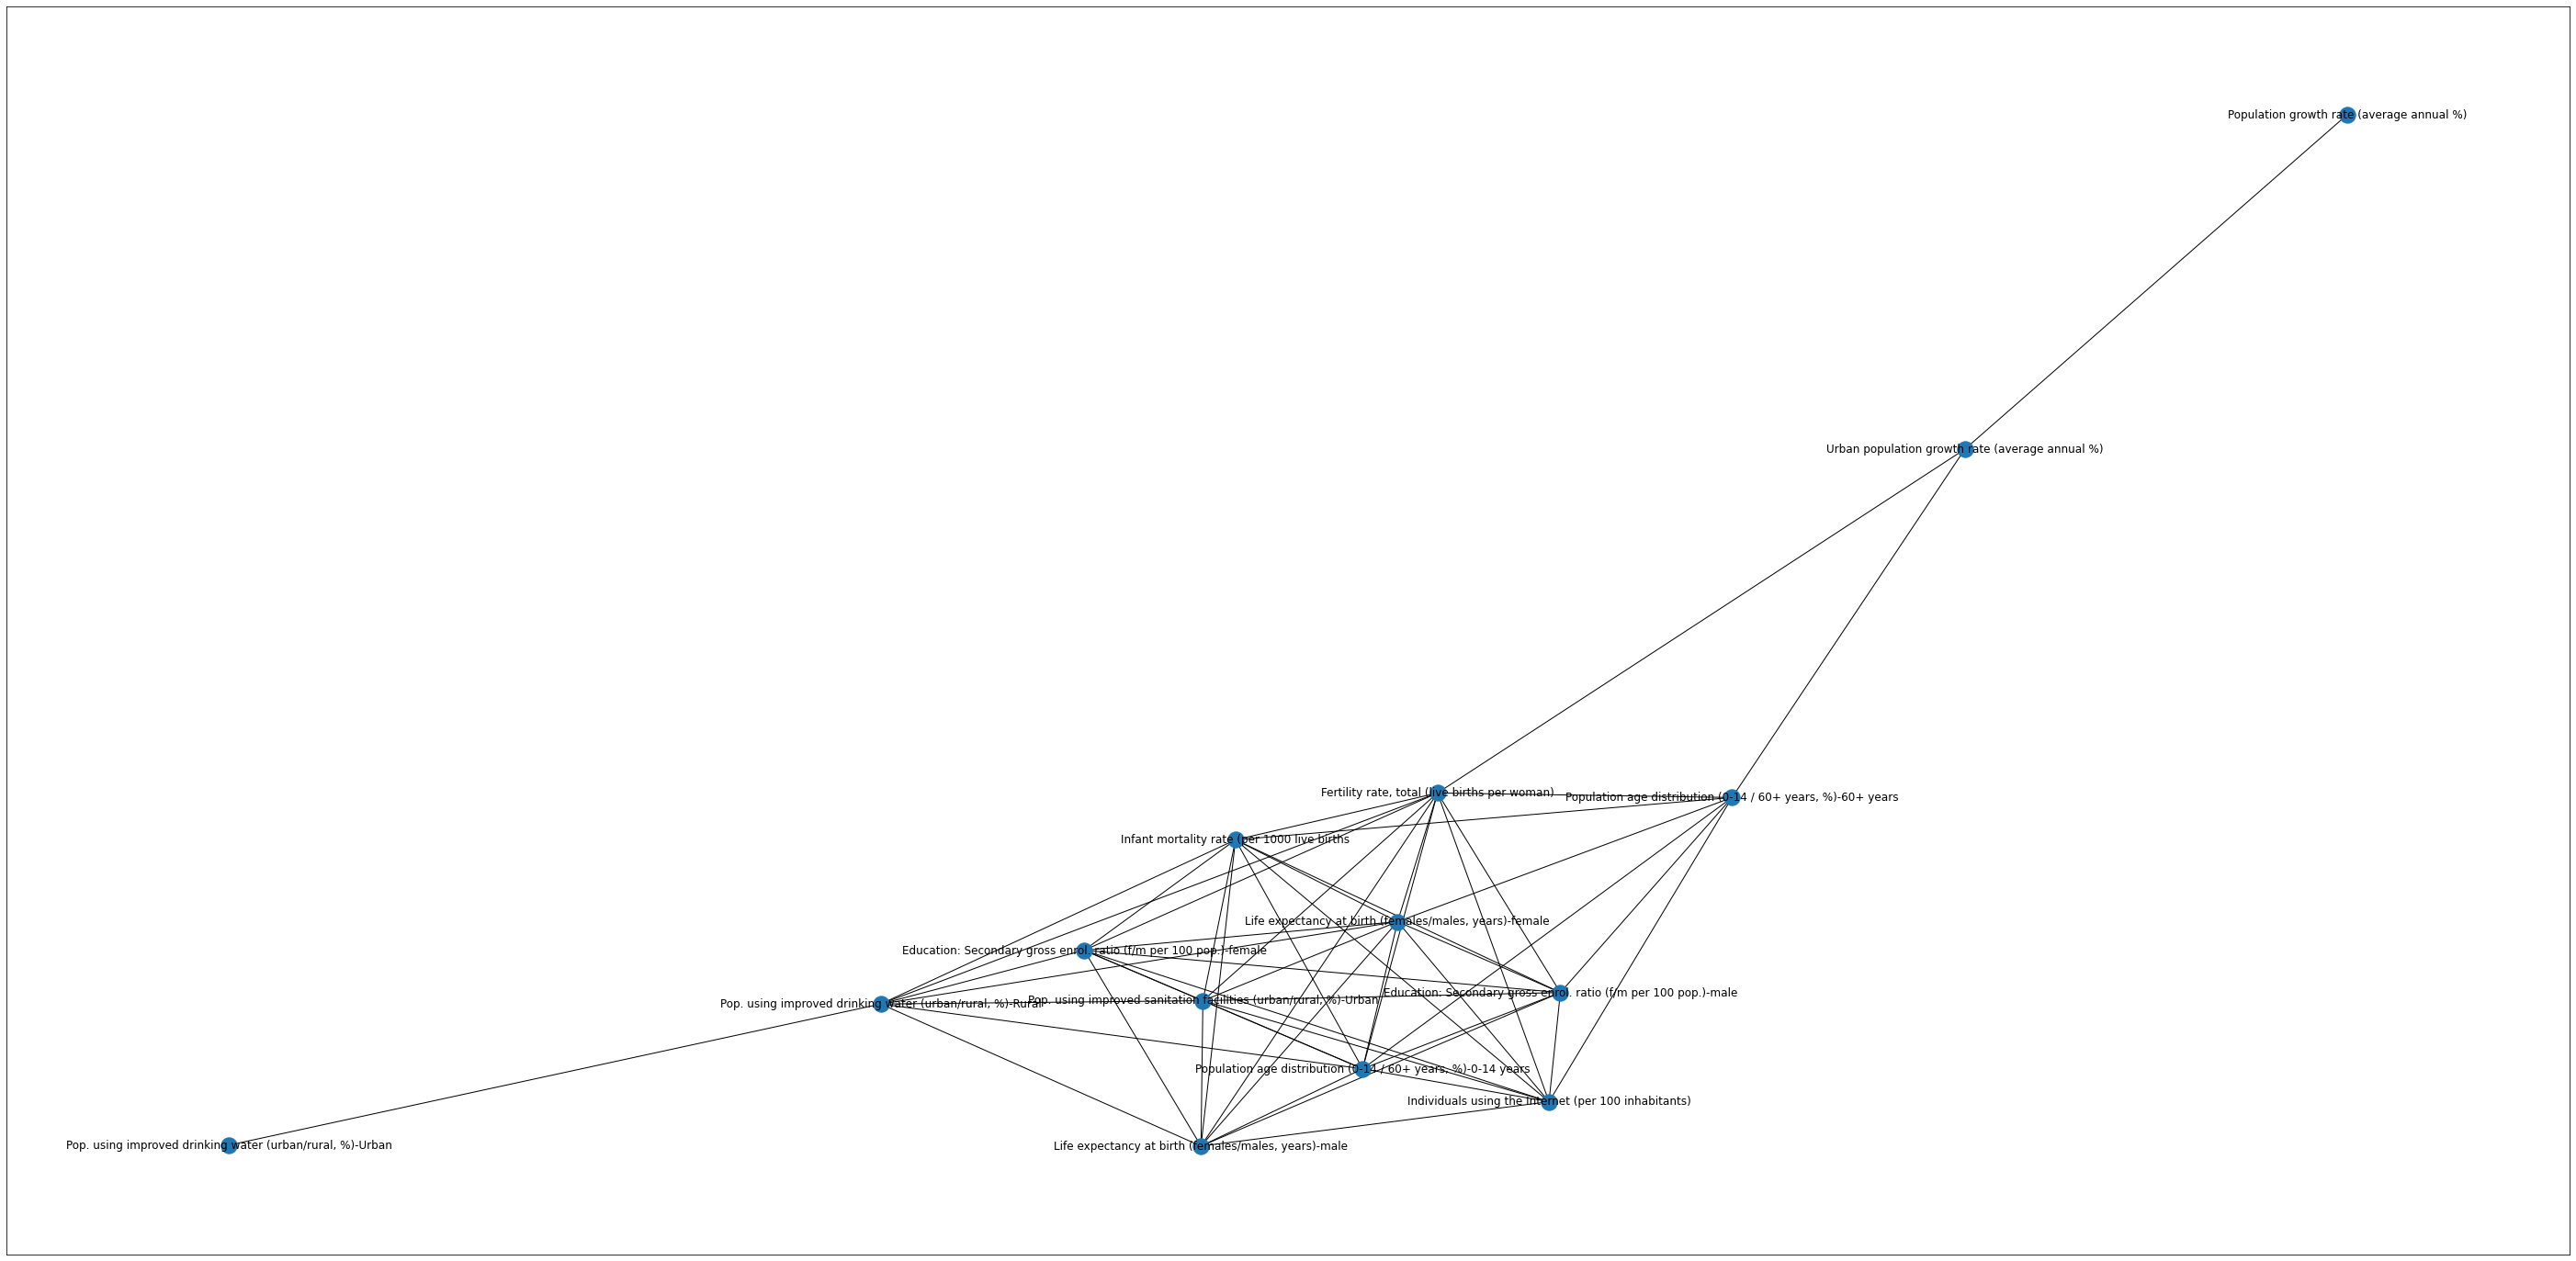

In [9]:
plt.figure(figsize=(50,25))
nx.draw_networkx(subgraphs[4])
plt.show()

The graphs provided a clearer understanding on the highly correlated columns for better visualisations to show how one column is related to each other

In [40]:
# keeping some important columns 
to_drop1=to_drop.copy()
to_drop1.remove("Life expectancy at birth (females/males, years)-female") #This is indicative of a country's healthcare system 
to_drop1.remove("Life expectancy at birth (females/males, years)-male") #This is indicative of a country's healthcare system
to_drop1.remove("Infant mortality rate (per 1000 live births") #This is indicative of a country's healthcare system
to_drop1.remove("Pop. using improved drinking water (urban/rural, %)-Rural") #showcases the propotion of individuals that have access to basic neccesities of good quality
to_drop1.remove("Education: Primary gross enrol. ratio (f/m per 100 pop.)-male") #showcases how many individuals get access to basic education
to_drop1.remove("International trade: Exports (million US$)") #shows country's ability to create enough goods to export
to_drop1.remove("International trade: Imports (million US$)") #shows country's economic ability to import the various goods

In [11]:
# duplicating data frame and dropping the columns
raw_data1=clean_data.copy()
raw_data1.drop(to_drop1, axis=1, inplace=True)

***Dropping more columns***   
1) Based on observations: certain columns are under the same umbrella theme for example: Population in thousands, population density, etc inform about a country's population
2) Hence some of these columns can be removed/ combined to provide a more succint data set


In [41]:
#Finding columns with common strings 
def common(string_name):
  a=string_name+"_cols"
  print(a)
  print("---------")
  a = [col for col in raw_data1.columns if string_name in col]
  for i in a:
    print(i)
  print()
common("GDP")
common("Pop")
common("Labour")
common("Economy")

GDP_cols
---------
GDP: Gross domestic product (million current US$)
GDP growth rate (annual %, const. 2005 prices)
GDP per capita (current US$)
Health: Total expenditure (% of GDP)

Pop_cols
---------
Population in thousands (2017)
Population density (per km2, 2017)
Population growth rate (average annual %)
Pop. using improved drinking water (urban/rural, %)-Urban
Pop. using improved drinking water (urban/rural, %)-Rural

Labour_cols
---------
Labour force participation (female/male pop. %)-female
Labour force participation (female/male pop. %)-male

Economy_cols
---------
Economy: Agriculture (% of GVA)
Economy: Industry (% of GVA)
Economy: Services and other activity (% of GVA)



***Dropping certain columns***  
1) GDP columns  
- GDP per capita indicates the average income for each person providing a more accurate indicator rather than GDP that does not take into account population size of a country   
- GDP growth rate shows the economic growth of the country however this would be a poor indicator as developed countries tend to have lower gdp growth rate while even poorer countries may have a low gdp growth rate. Hence there would be no obvious distincting factor between underdeveloped countries and developed countrues
2) Population column  
- There is no obvious pattern/distinction in the  population density and population between underdevolped, developing and developed countries  
- Population growth rate indicates which countries have rapidly increasing population, therefore, indicating a greater need for financial aid to meet the increasing needs
- Population using improved drinking water-urban and rural can be combined to give a good indicators of a country's condition as it shows much access individual's in the country have to basis neccessities at a good quality
3) Labour column  
- Labour force participation female and labour force participation male can be combined to determine the average labour force participation across the two genders
5) Economy column  
- Individuals in underdeveloped countries tend to engage more in agriculture and farming hence economy: % agriculture would have a more distinct pattern   
   
Dropped columns:
***GDP growth rate (annual %, const. 2005 prices), GDP: Gross domestic product (million current US$), Population in thousands (2017), Population density (per km2, 2017), Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA)***

In [14]:
# dropping the columns
col_to_drop=["GDP growth rate (annual %, const. 2005 prices)", "GDP: Gross domestic product (million current US$)","Population in thousands (2017)", "Population density (per km2, 2017)",  "Economy: Industry (% of GVA)","Economy: Services and other activity (% of GVA)"]
raw_data2=raw_data1.copy()
raw_data2.drop(col_to_drop, axis=1, inplace=True)

In [42]:
raw_data2.head()


Surface area (km2)  Sex ratio (m per 100 f, 2017)  \
0            652864.0                          106.3   
1             28748.0                          101.9   
2           2381741.0                          102.0   
4               468.0                          102.3   
5           1246700.0                           96.2   

   GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                         623.2                             23.3   
1                        3984.2                             22.4   
2                        4154.1                             12.2   
4                       39896.4                              0.5   
5                        4714.1                              6.8   

   Agricultural production index (2004-2006=100)  \
0                                            125   
1                                            134   
2                                            160   
4                                            115   
5                                            175   

   International trade: Exports (million US$)  \
0                                      1458.0   
1                                      1962.0   
2                                     29992.0   
4                                       100.0   
5                                     21011.0   

   International trade: Imports (million US$)  \
0                                      3568.0   
1                                      4669.0   
2                                     47091.0   
4                                      1355.0   
5                                      8790.0   

   International trade: Balance (million US$)  \
0                                     -2110.0   
1                                     -2707.0   
2                                    -17099.0   
4                                     -1255.0   
5                                     12221.0   

   Population growth rate (average annual %)  \
0                                        3.2   
1                                       -0.1   
2                                        2.0   
4                                       -1.6   
5                                        3.5   

   Urban population (% of total population)  ...  \
0                                      26.7  ...   
1                                      57.4  ...   
2                                      70.7  ...   
4                                      85.1  ...   
5                                      44.1  ...   

   Education: Primary gross enrol. ratio (f/m per 100 pop.)-male  \
0                                              131.6               
1                                              115.5               
2                                              119.5               
4                                              103.5               
5                                              156.9               

   International migrant stock (000/% of total pop.)-as % of total pop  \
0                                                1.2                     
1                                                2.0                     
2                                                0.6                     
4                                               59.7                     
5                                                0.4                     

   Pop. using improved drinking water (urban/rural, %)-Urban  \
0                                               78.2           
1                                               94.9           
2                                               84.3           
4                                              100.0           
5                                               75.4           

   Pop. using improved drinking water (urban/rural, %)-Rural      country  \
0                                               47.0          Afghanistan   
1                                               95.2            

***Combining columns***  
Certain columns are split by male and female such as labour force participation. Combining these columns would give us the average of them indcative of the whole population 

In [43]:
# combining labour force participation-male and female into one column
raw_data2["Average labour force participation"]=(raw_data2["Labour force participation (female/male pop. %)-female"]+
raw_data2["Labour force participation (female/male pop. %)-male"])/2
# combining Life expectancy at birth (females/males, years)-female and Life expectancy at birth (females/males, years)-male
raw_data2["Average life expectancy"]=(raw_data2["Life expectancy at birth (females/males, years)-female"]+
raw_data2["Life expectancy at birth (females/males, years)-male"])/2
# combining Pop. using improved drinking water (urban/rural, %)-Urban and Pop. using improved drinking water (urban/rural, %)-Rural
raw_data2["Average pop. using improved drinking water"]=(raw_data2["Pop. using improved drinking water (urban/rural, %)-Urban"]+raw_data2["Pop. using improved drinking water (urban/rural, %)-Rural"])/2
# combining Education: Primary gross enrol. ratio (f/m per 100 pop.)-female	and Education: Primary gross enrol. ratio (f/m per 100 pop.)-male
raw_data2["Average Education: Primary gross enrol"]=(raw_data2["Education: Primary gross enrol. ratio (f/m per 100 pop.)-female"]+
raw_data2["Education: Primary gross enrol. ratio (f/m per 100 pop.)-male"])/2
#dropping the columns that were used to combine
drop=["Labour force participation (female/male pop. %)-female","Labour force participation (female/male pop. %)-male", "Life expectancy at birth (females/males, years)-female","Life expectancy at birth (females/males, years)-male","Pop. using improved drinking water (urban/rural, %)-Urban","Pop. using improved drinking water (urban/rural, %)-Rural","Education: Primary gross enrol. ratio (f/m per 100 pop.)-female","Education: Primary gross enrol. ratio (f/m per 100 pop.)-male"]
raw_data3= raw_data2.copy()
raw_data3.drop(drop, axis=1, inplace=True)

In [17]:
#checking if data has been dropped
raw_data3.shape


(191, 24)

***Further removing redundant columns as certain columns do not provide much information about the financial aid needed***  
1) Surface area (km2): simply indicates a country's size does not have a clear relation to financial aid  
2) Sex ratio (m per 100 f, 2017): simply indicates a country's gender ratio does not have a clear relation to financial aid  
3) Seats held by women in national parliaments % : indicative of woman representation rather than country's condition  
4) Threatened species (number) : has to do with animals with no distinct pattern between different countries  
5) Forested area (% of land area): simply indicative of which countries has more forested area
6) International migrant stock (000/% of total pop.)-as % of total pop: simply indicates the number of people born in a country other than that in which they live

In [18]:
raw_data4= raw_data3.copy()
col_drop=["Surface area (km2)","Sex ratio (m per 100 f, 2017)","Seats held by women in national parliaments %","Threatened species (number)","Forested area (% of land area)","International migrant stock (000/% of total pop.)-as % of total pop"]
raw_data4.drop(col_drop, axis=1, inplace=True)

In [45]:
# checking if columns has been dropped
raw_data4.head()

GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                         623.2                             23.3   
1                        3984.2                             22.4   
2                        4154.1                             12.2   
4                       39896.4                              0.5   
5                        4714.1                              6.8   

   Agricultural production index (2004-2006=100)  \
0                                            125   
1                                            134   
2                                            160   
4                                            115   
5                                            175   

   International trade: Exports (million US$)  \
0                                      1458.0   
1                                      1962.0   
2                                     29992.0   
4                                       100.0   
5                                     21011.0   

   International trade: Imports (million US$)  \
0                                      3568.0   
1                                      4669.0   
2                                     47091.0   
4                                      1355.0   
5                                      8790.0   

   International trade: Balance (million US$)  \
0                                     -2110.0   
1                                     -2707.0   
2                                    -17099.0   
4                                     -1255.0   
5                                     12221.0   

   Population growth rate (average annual %)  \
0                                        3.2   
1                                       -0.1   
2                                        2.0   
4                                       -1.6   
5                                        3.5   

   Urban population (% of total population)  \
0                                      26.7   
1                                      57.4   
2                                      70.7   
4                                      85.1   
5                                      44.1   

   Infant mortality rate (per 1000 live births  \
0                                         68.6   
1                                         14.6   
2                                         27.7   
4                                         18.0   
5                                         65.4   

   Health: Total expenditure (% of GDP)  \
0                                   8.2   
1                                   5.9   
2                                   7.2   
4                                   8.1   
5                                   3.3   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              106.4     
2                                              113.0     
4                                               88.1     
5                                               60.8     

   Energy supply per capita (Gigajoules)      country          Region  \
0                                      5  Afghanistan    SouthernAsia   
1                                     36      Albania  SouthernEurope   
2                                     55      Algeria  NorthernAfrica   
4                                    119      Andorra  SouthernEurope   
5                                     25       Angola    MiddleAfrica   

   Average labour force participation  Average life expectancy  \
0                              51.450                   62.250   
1                              50.600                   77.750   
2                              43.850                   75.300   
4                              63.625                   72.725   
5                              68.450                   60.200   

   Average pop. using improved drinking water  \
0                             

### Data description of selected columns  
1) GDP per capita (current US$): is a financial metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a nation by its population.	
2) Economy: Agriculture (% of GVA): Indicates the propotion of money(gross-value added) the country earns from agriculture goods
3) Agricultural production index (2004-2006=100): measures the levels of agricultural product relative to the base year
4) International trade: Exports (million US$): shows how much goods a country exports annually	
5) International trade: Imports (million US$): shows how much goods a country exports annually		
6) International trade: Balance (million US$):  the difference between the value of a country's exports and the value of a country's imports for a given period	
7) Population growth rate (average annual %): indicates how fast a country's population is growing	The annual average rate of change of population size, for a given country, territory, or geographic area, per year
8) Urban population (% of total population): propotion of the total population that lives in the urban area	
9) Infant mortality rate (per 1000 live births): The average number of years a new born child would live if the current mortality patterns are to remain the same  
10) Health: Total expenditure (% of GDP): Shows the percentage of income government spends on healthcare   
11) Mobile-cellular subscriptions (per 100 inhabitants): Shows the number of people that utilise mobile phones for every 100 people
12) Energy supply per capita (Gigajoules): per capita expression of how much energy use there is in a given country or area
13) Country	
14) Region: the region the country belongs to
15) Average labour force participation: Shows the percentage of the civilian noninstitutional population 16 years and older that is working or actively looking for work.
16) Average life expectancy: The average period an individual is expected to live
17) Average pop. using improved drinking water: population that has access to clean water
18) Average education primary gross enrol: number of students enrolled in a given level of education regardless of age by the population of the age group 

In [44]:
# quick view of columns and values
raw_data4.head()

GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                         623.2                             23.3   
1                        3984.2                             22.4   
2                        4154.1                             12.2   
4                       39896.4                              0.5   
5                        4714.1                              6.8   

   Agricultural production index (2004-2006=100)  \
0                                            125   
1                                            134   
2                                            160   
4                                            115   
5                                            175   

   International trade: Exports (million US$)  \
0                                      1458.0   
1                                      1962.0   
2                                     29992.0   
4                                       100.0   
5                                     21011.0   

   International trade: Imports (million US$)  \
0                                      3568.0   
1                                      4669.0   
2                                     47091.0   
4                                      1355.0   
5                                      8790.0   

   International trade: Balance (million US$)  \
0                                     -2110.0   
1                                     -2707.0   
2                                    -17099.0   
4                                     -1255.0   
5                                     12221.0   

   Population growth rate (average annual %)  \
0                                        3.2   
1                                       -0.1   
2                                        2.0   
4                                       -1.6   
5                                        3.5   

   Urban population (% of total population)  \
0                                      26.7   
1                                      57.4   
2                                      70.7   
4                                      85.1   
5                                      44.1   

   Infant mortality rate (per 1000 live births  \
0                                         68.6   
1                                         14.6   
2                                         27.7   
4                                         18.0   
5                                         65.4   

   Health: Total expenditure (% of GDP)  \
0                                   8.2   
1                                   5.9   
2                                   7.2   
4                                   8.1   
5                                   3.3   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              106.4     
2                                              113.0     
4                                               88.1     
5                                               60.8     

   Energy supply per capita (Gigajoules)      country          Region  \
0                                      5  Afghanistan    SouthernAsia   
1                                     36      Albania  SouthernEurope   
2                                     55      Algeria  NorthernAfrica   
4                                    119      Andorra  SouthernEurope   
5                                     25       Angola    MiddleAfrica   

   Average labour force participation  Average life expectancy  \
0                              51.450                   62.250   
1                              50.600                   77.750   
2                              43.850                   75.300   
4                              63.625                   72.725   
5                              68.450                   60.200   

   Average pop. using improved drinking water  \
0                             

In [21]:
# standard statistical measures
raw_data4.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
count                    191.000000                       191.000000   
mean                   14192.967016                        12.006545   
std                    23460.674919                        12.023846   
min                      144.500000                         0.000000   
25%                     1795.450000                         2.700000   
50%                     5105.800000                         7.950000   
75%                    15562.300000                        18.950000   
90%                    41686.200000                        26.700000   
95%                    51795.600000                        34.550000   
99%                   106731.780000                        52.280000   
max                   169491.800000                        70.800000   

       Agricultural production index (2004-2006=100)  \
count                                     191.000000   
mean                                      118.188482   
std                                        24.695750   
min                                        39.000000   
25%                                       102.500000   
50%                                       115.000000   
75%                                       133.500000   
90%                                       152.000000   
95%                                       160.000000   
99%                                       180.400000   
max                                       199.000000   

       International trade: Exports (million US$)  \
count                                1.910000e+02   
mean                                 7.876784e+04   
std                                  2.312598e+05   
min                                  0.000000e+00   
25%                                  1.106000e+03   
50%                                  5.327000e+03   
75%                                  3.657200e+04   
90%                                  1.956130e+05   
95%                                  3.934720e+05   
99%                                  1.351993e+06   
max                                  2.118981e+06   

       International trade: Imports (million US$)  \
count                                1.910000e+02   
mean                                 7.930852e+04   
std                                  2.343405e+05   
min                                  1.200000e+01   
25%                                  2.563000e+03   
50%                                  8.532000e+03   
75%                                  4.641450e+04   
90%                                  1.894060e+05   
95%                                  3.950090e+05   
99%                                  1.113474e+06   
max                                  2.249661e+06   

       International trade: Balance (million US$)  \
count                                  191.000000   
mean                                  -496.094241   
std                                  76727.104751   
min                                -796494.000000   
25%                                  -3748.000000   
50%                                  -1079.000000   
75%                                    309.000000   
90%                                  15413.000000   
95%                                  46644.000000   
99%                                 120918.600000   
max                                 530285.000000   

       Population growth rate (average annual %)  \
count                                 191.000000   
mean                                    1.405236   
std                                     1.373039   
min                                    -2.300000   
25%                                     0.450000   
50%                                     1.200000   
75%                                     2.200000   
90%                                     3.000000   
95%                                     3.300000   
99%                                   

In [81]:
raw_data4.shape

(191, 19)

# Univariate analysis  



1) Looking at the data distribution for the various columns based on diferent categories

In [56]:

raw_data5=raw_data4.copy()

In [57]:
def describe(a,b):
 f, axes = plt.subplots(b, 3, figsize=(21, 28))
 count = 0
 for var in a:
    sb.boxplot(data = raw_data5[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = raw_data5[var], ax = axes[count,1])
    sb.violinplot(data = raw_data5[var], orient = "h", ax = axes[count,2])
    count += 1

***Examining columns that showcase the economical condition of the country***


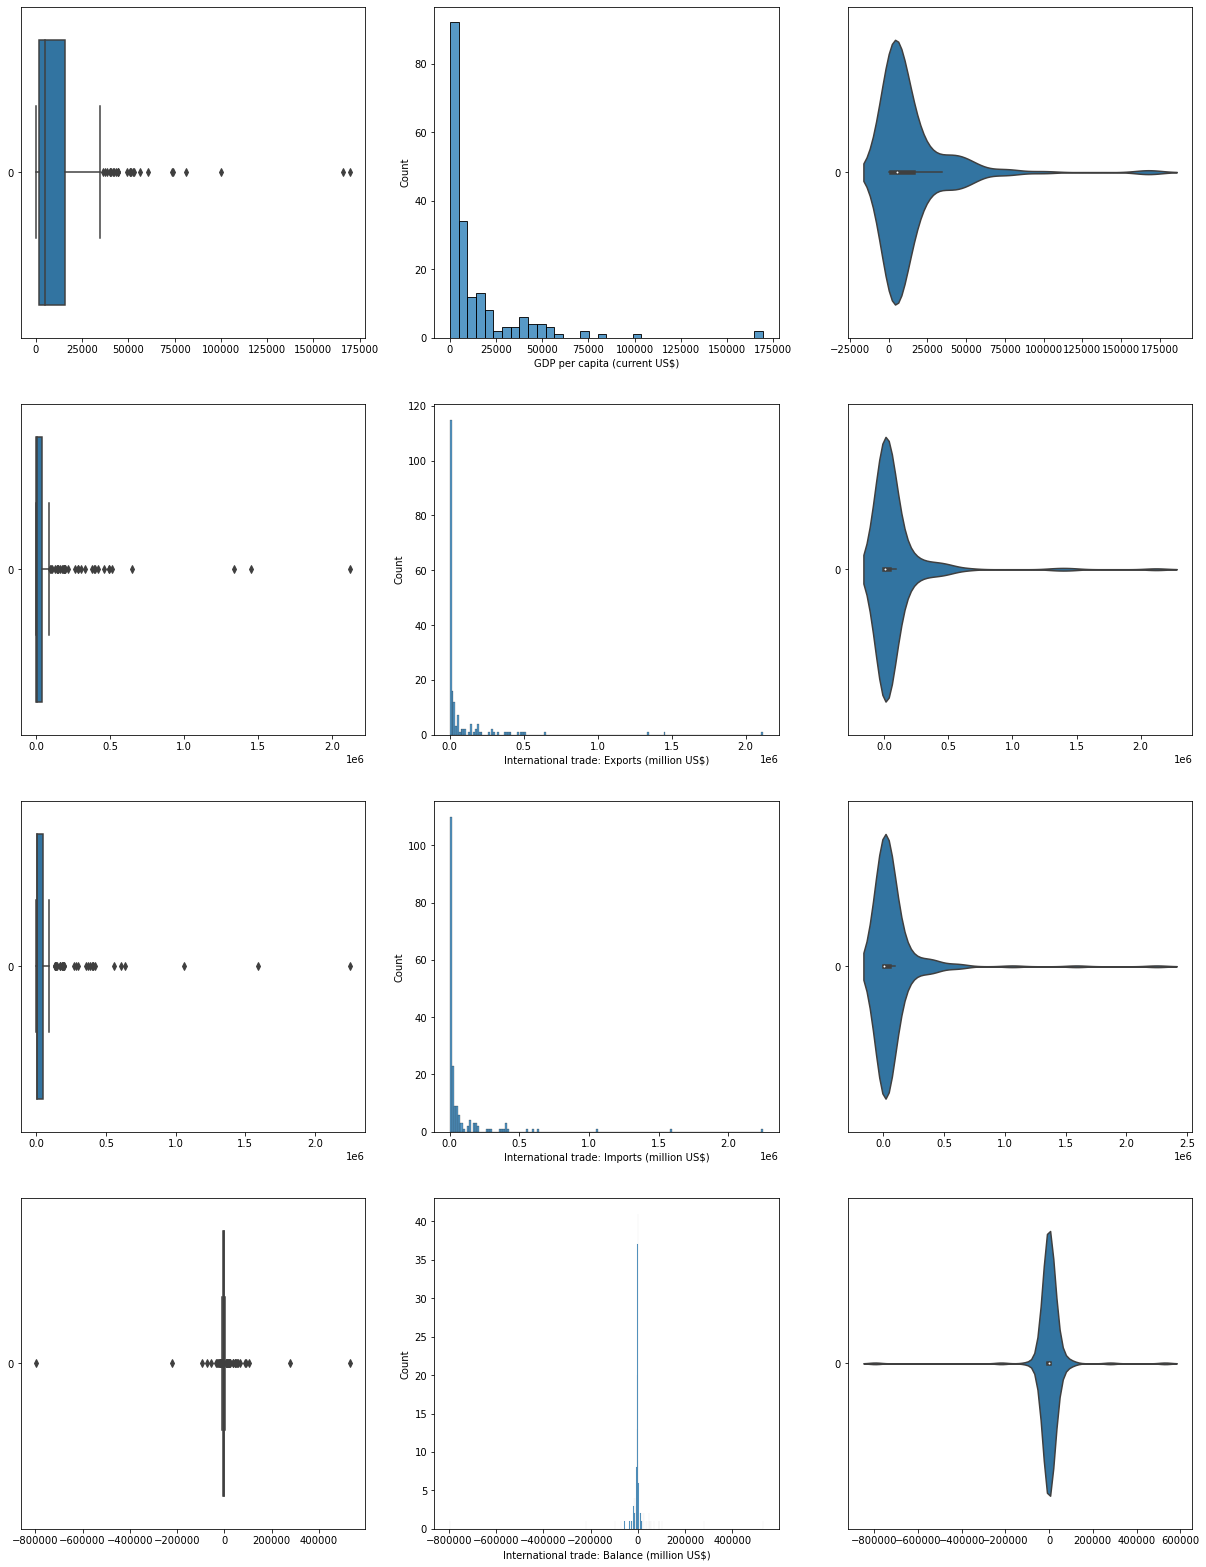

In [58]:
economy=["GDP per capita (current US$)","International trade: Exports (million US$)","International trade: Imports (million US$)","International trade: Balance (million US$)"]
describe(economy,4)

***Insights***
1) GDP per capita: right skewed with multiple outliers on the higher end, two countries especially far from the rest (shows that there are huge differences between the GDP per capita(often indicative of income) of countries at the lower end than those at the higher end)
2) International trade(Exports): right skewed with multiple outliers on the higher end (certain countries export alot to obtain income)
3) International trade(Imports): similar to that of exports; right skewed with multiple outliers on the higher end (certain countries import alot)
4) International trade: Balance (million US$): approximately normally distributed(narrow distribution) with multiple outliers on bond ends



***Examining columns that showcase the healthcare system of the country***

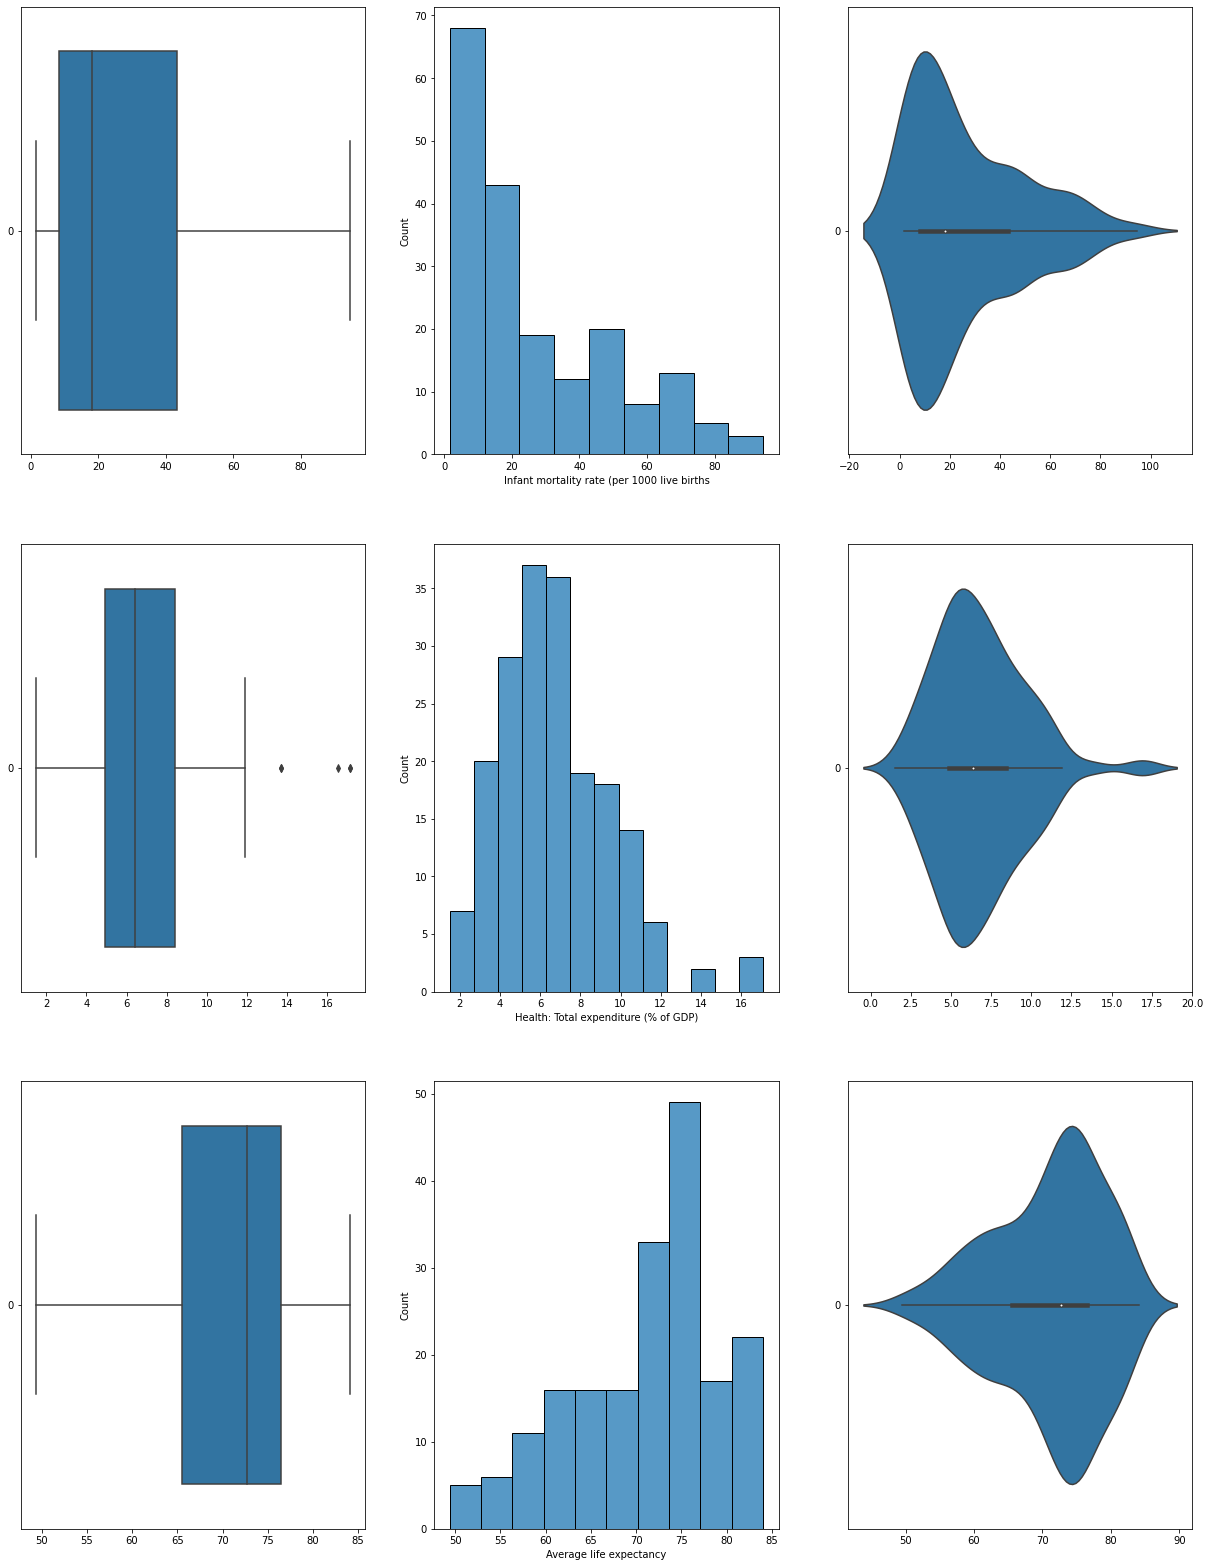

In [50]:
health=["Infant mortality rate (per 1000 live births","Health: Total expenditure (% of GDP)","Average life expectancy"]
describe(health,3)

***Insights***
1) Infant mortality rate (per 1000 live births: right skewed with no outliers
2) Health: Total expenditure (% of GDP): slightly right skewed with minimal outliers on the higher end
3) Average life expectancy: left skewed with no outliers (shows most countries have higher life expectancy the ones of concern would be those at the lower end)

***Examining columns that showcase the education and employment of the country***

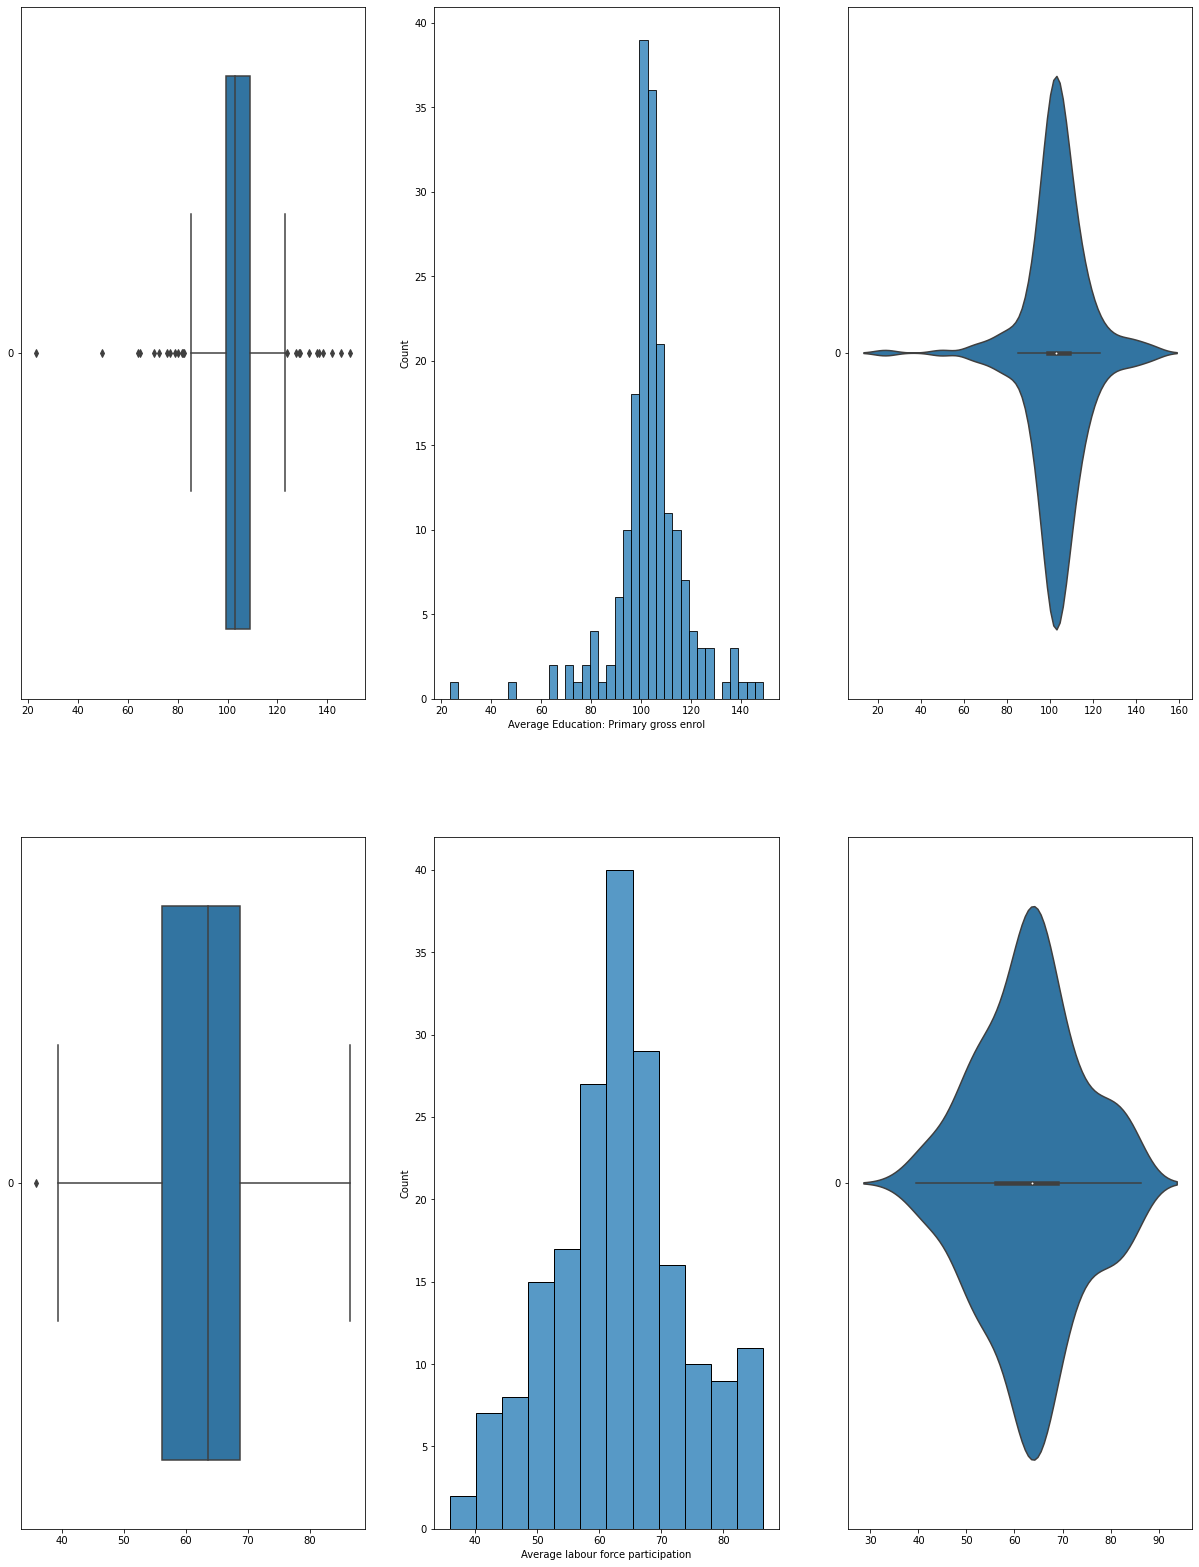

In [51]:
edu_emp=["Average Education: Primary gross enrol","Average labour force participation"]
describe(edu_emp,2)

***Insights***
1) Average education primary gross enrol ratio: approximately normally distributed with multiple outliers
2) Average labour force participation: approximately normally distributed with one outlier at the lower end

***Examining the columns that determine the access to different neccesities and priviliges such as mobile phones***


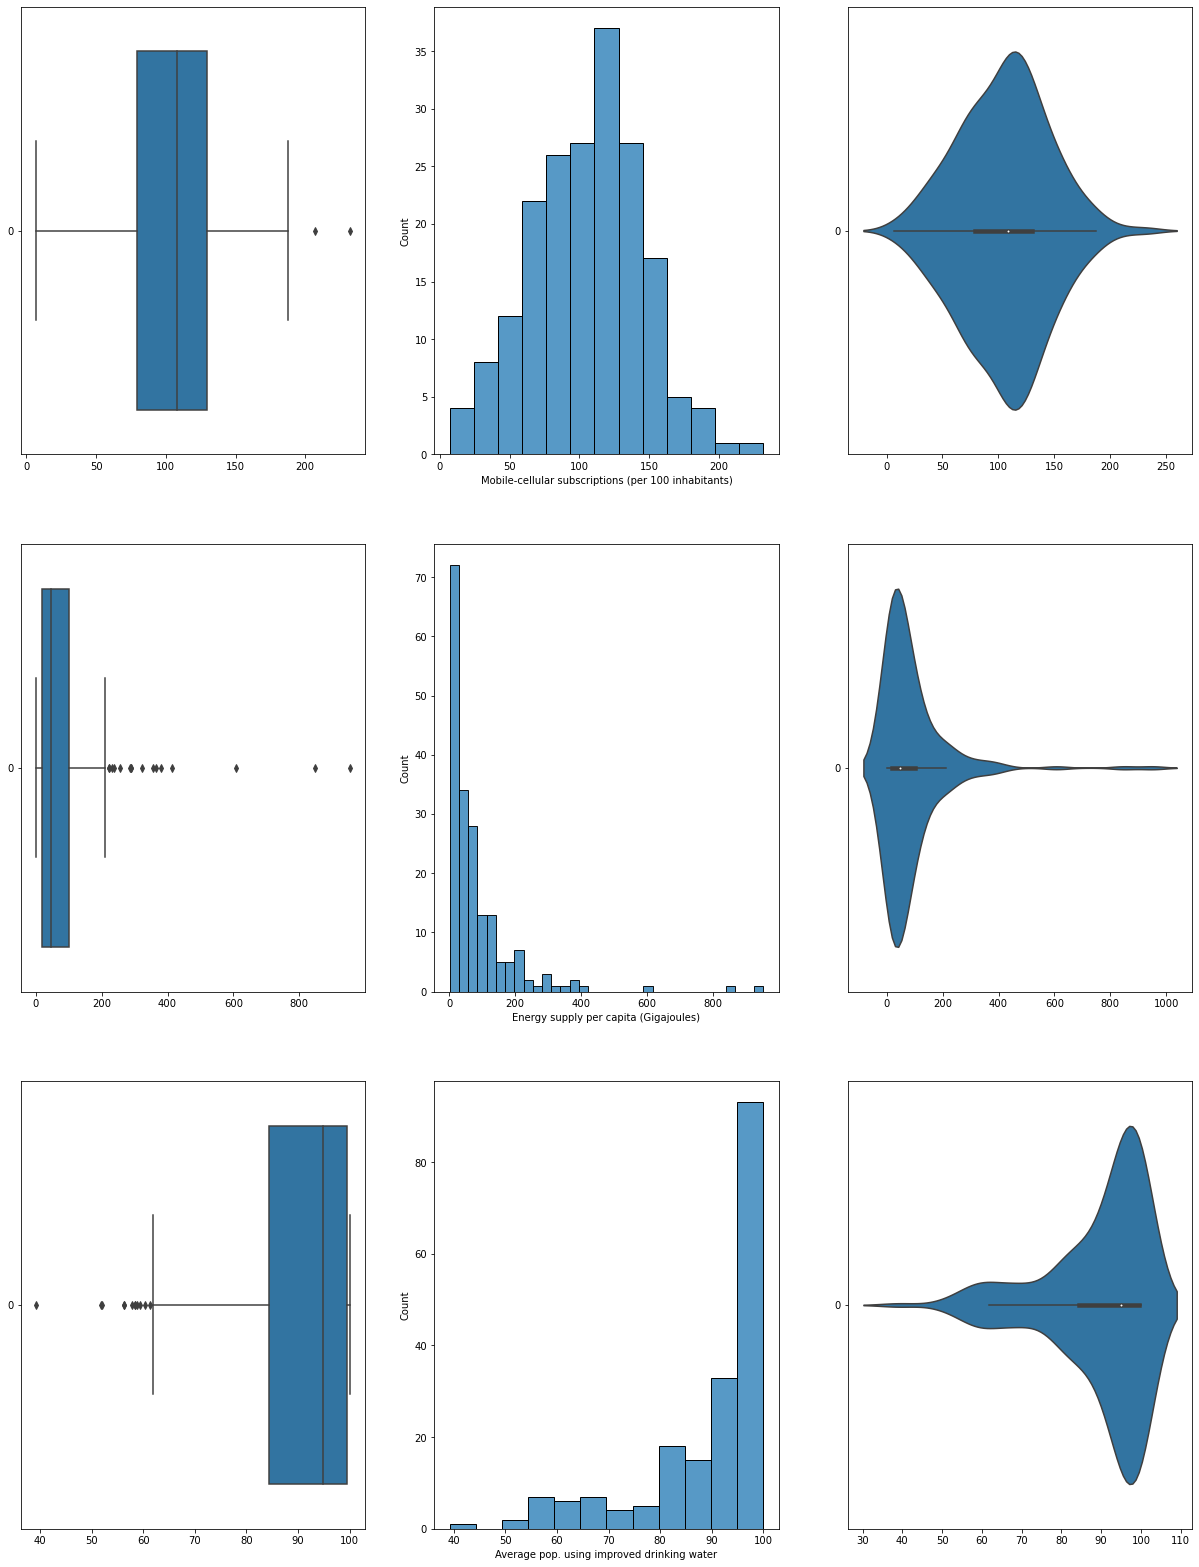

In [53]:
access=["Mobile-cellular subscriptions (per 100 inhabitants)","Energy supply per capita (Gigajoules)","Average pop. using improved drinking water"]
describe(access,3)

***Insights***
1) Mobile-cellular subscriptions (per 100 inhabitants): approximately normally distributed with minimal outliers
2) Energy supply per capita (Gigajoules): right skewed with multiple outliers on the higher end	
3) Average pop. using improved drinking water: left skewed with multiple outliers at the lower end (concermed with the outliers)

***Examining population columns***


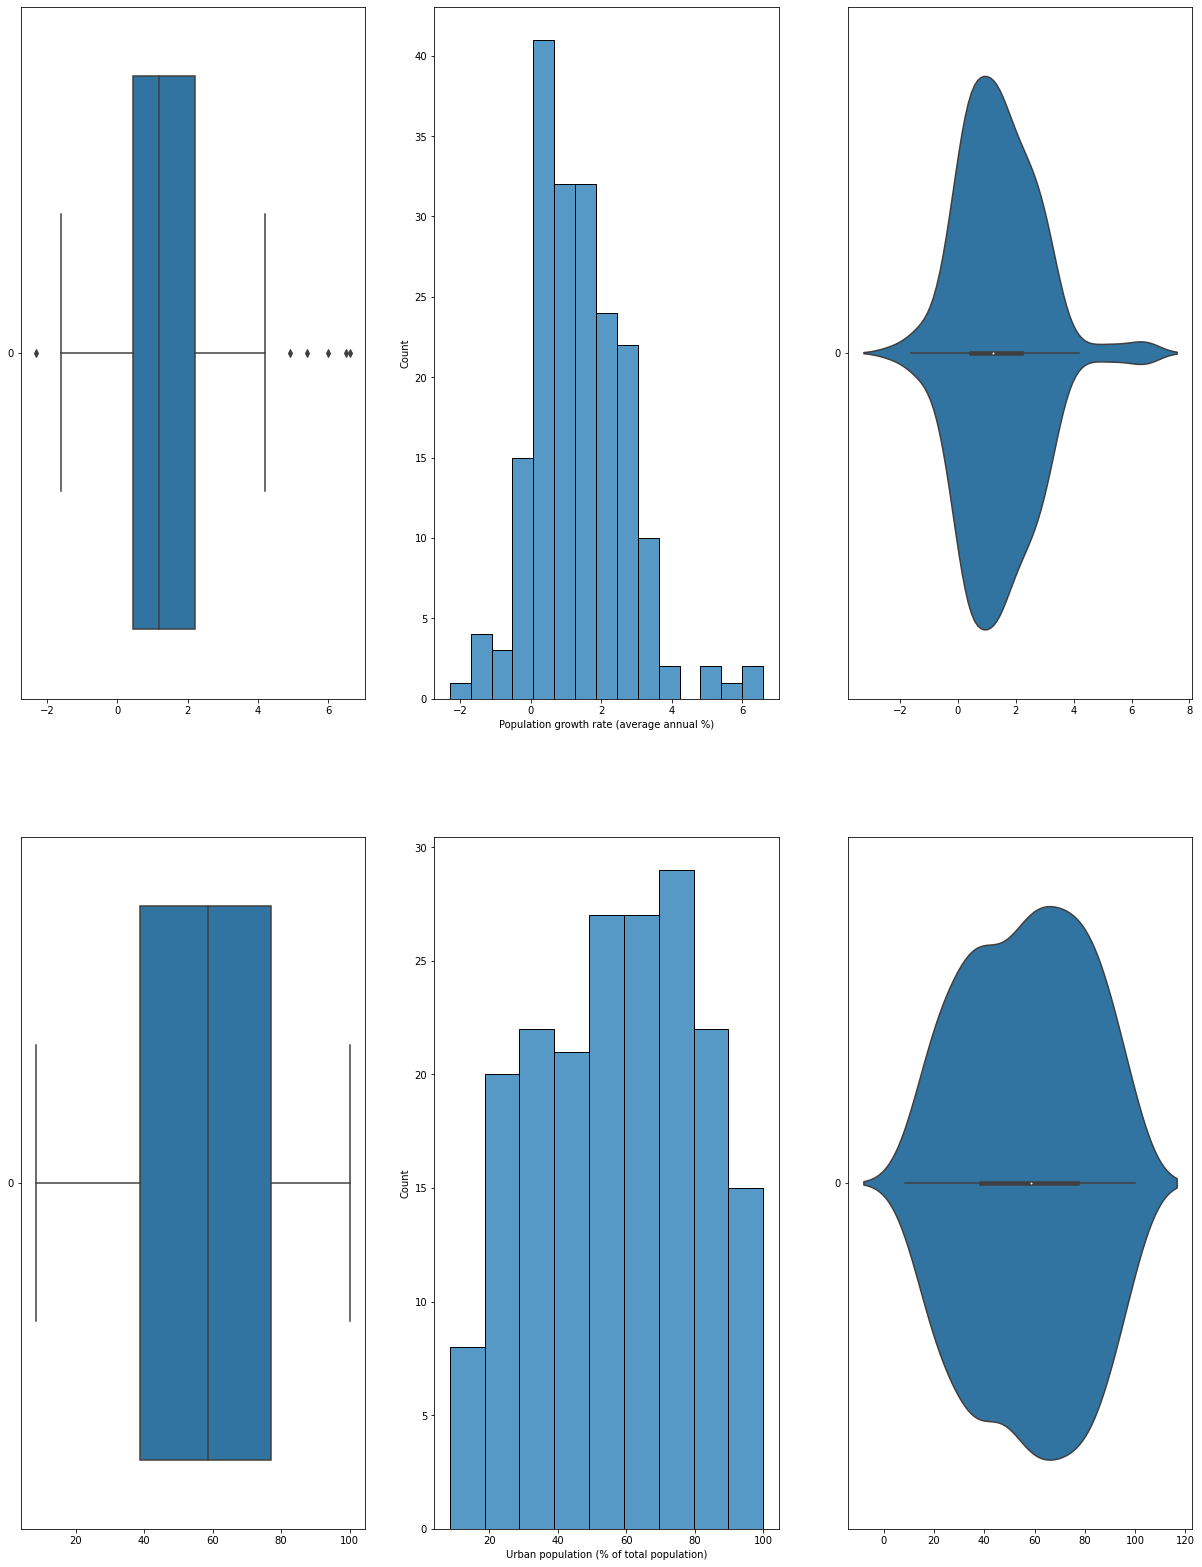

In [54]:
population=["Population growth rate (average annual %)","Urban population (% of total population)" ]
describe(population,2)

***Insights***
1) Population growth rate (average annual %): slightly right skewed with minimal outliers, most of which are on the higher end
2) Urban population (% of total population): approximatey normally distributed with no outliers	

***Examining agriculture-related columns***

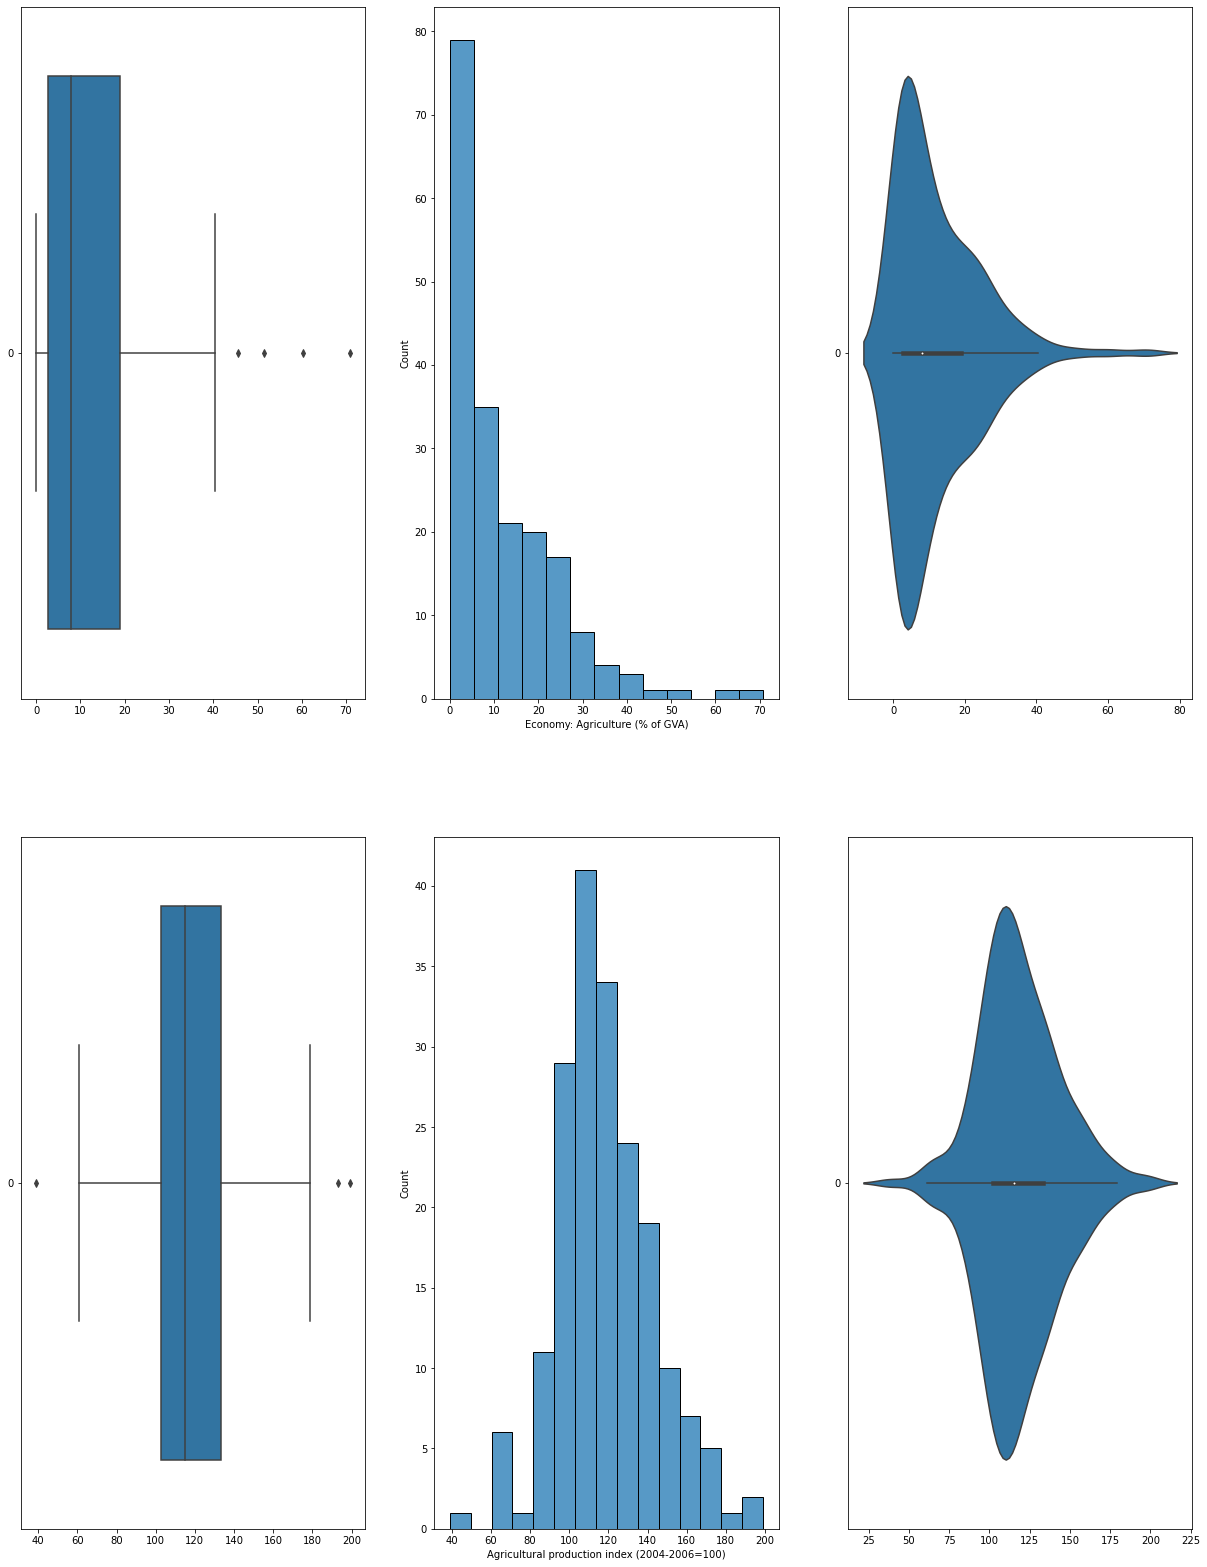

In [61]:
agriculture=["Economy: Agriculture (% of GVA)","Agricultural production index (2004-2006=100)"]
describe(agriculture,2)

***Insights***
1) Economy: Agriculture (% of GVA): right skewed with minimal outliers(4) at the higher end
2) Agricultural production index: approximately normally distributed with minimal outliers 


***Overall Insights***  
Most of the columns have skewed distribution and outliers  

Looking at the data distribution we can see that there are some features that do indeed have outliers especially feautures like international trade,GDP per capita and energy supply per capita.

- However, removing these outliers would shrink the shape of data given the already limited number of countries (191) and the under-developed countries which are in actual dire need may not contribute to the dataset.  
- Furthermore there has to be some exclusions to the outlier tretment like average pop. using improved drinking water, education as these are matters of concern so we cannot undercapp this features. 
- Those outliers at the higher end for variables like GDP per capita will give us a guage of countries that do not require much financial end
- Most variables have outliers on the upper side except fo international trade and average population using drinking water( indicating that some countries have poor access to drinking water which is a matter of concern)
- There are very few outliers for all variables except for GDP, international trade, energy supply per capita and average population using drinking water


***Determining the top 10 countries for each variable to see whether there is any countries that are struggling in repeated regions***

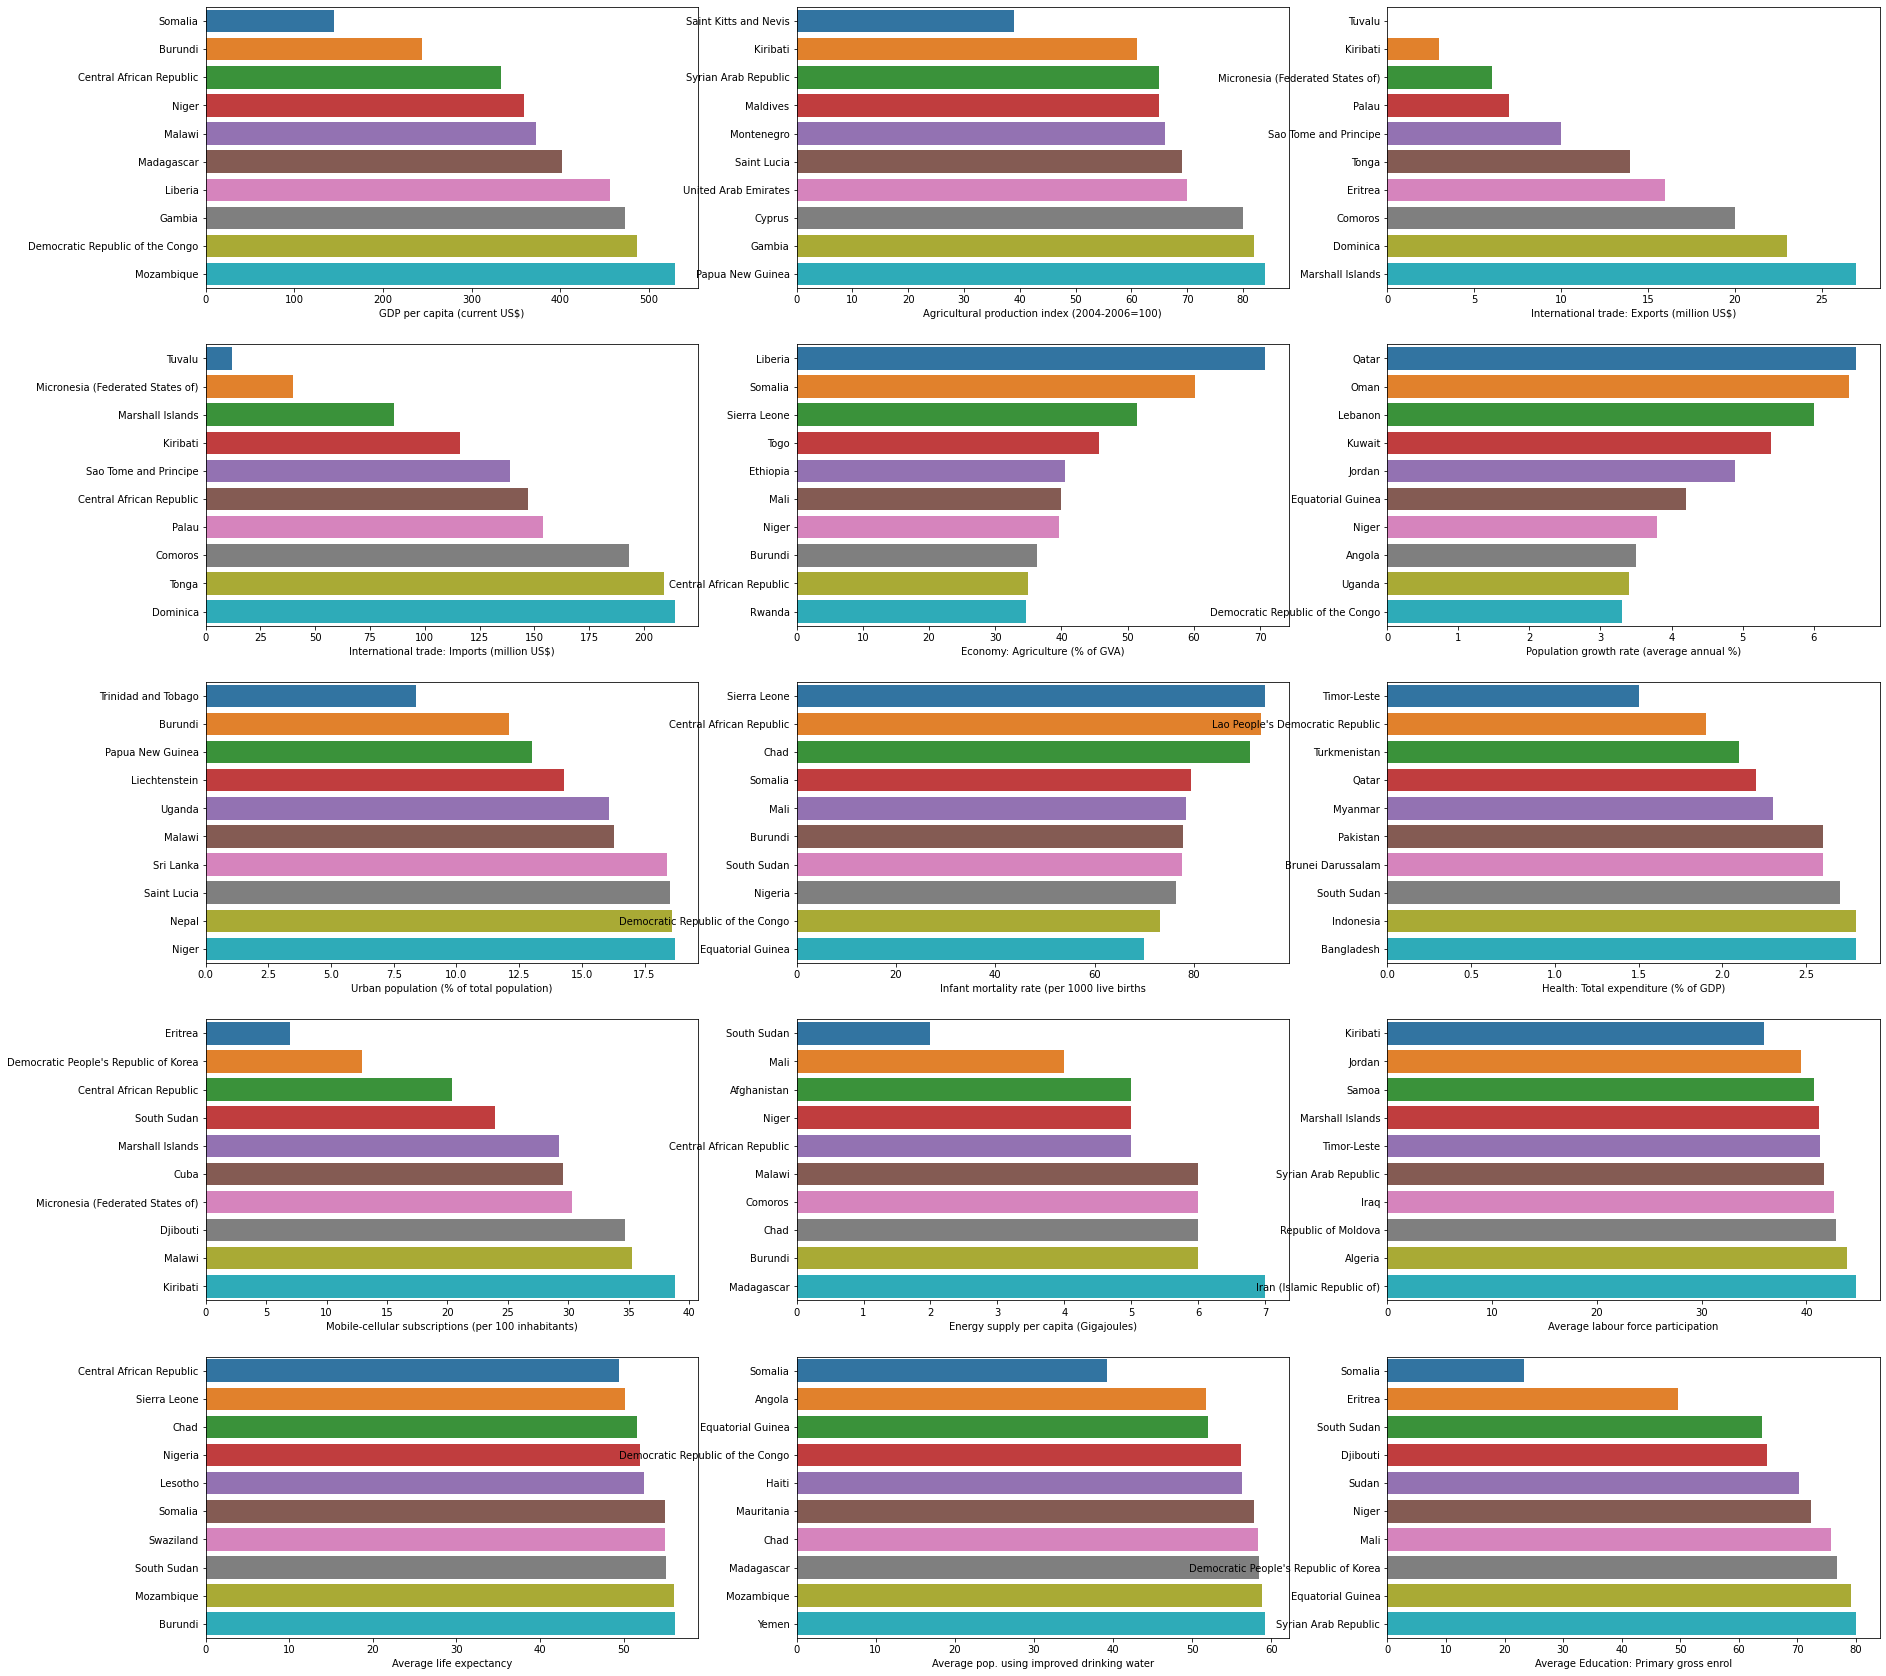

In [65]:
fig, axs = plt.subplots(5,3,figsize = (30,30))
def ten(a,b,c,d):
  pt= raw_data4[['country',a]].sort_values(a, ascending = b).head(10) #sorting the countries in order
  pt1 = sb.barplot(x=a, y='country', data= pt, ax = axs[c,d])
  pt1.set(xlabel = a, ylabel= '')
  
# finding the 10 countries that need the financial aid the most based on each indicator
ten("GDP per capita (current US$)",True,0,0)
ten("Agricultural production index (2004-2006=100)",True,0,1) 
ten("International trade: Exports (million US$)",True,0,2)
ten("International trade: Imports (million US$)",True,1,0)
ten("Economy: Agriculture (% of GVA)",False,1,1) #underdeveloped countries tend to rely on agriculture
ten("Population growth rate (average annual %)",False,1,2) #Higher population growth rate indicate fast growing population hence may require more funds
ten("Urban population (% of total population)",True,2,0)
ten("Infant mortality rate (per 1000 live births",False,2,1) #The higher the infant mortality rate the more concering
ten("Health: Total expenditure (% of GDP)",True,2,2)
ten("Mobile-cellular subscriptions (per 100 inhabitants)",True,3,0)
ten("Energy supply per capita (Gigajoules)",True,3,1)
ten("Average labour force participation",True,3,2)
ten("Average life expectancy",True,4,0)
ten("Average pop. using improved drinking water",True,4,1)
ten("Average Education: Primary gross enrol",True,4,2)


***Insights:***

- From above bar plot we could see the common countries that have been repeated in more than one areas like Somalia,Liberia, Niger, Burundi, South Sudan. This indicates that there are already a group of countries that require financial aid the most hence clustering would be a good method to identify these countries and anomaly detection for countries that have appeared in the bottom 10 for more than 3 components like Niger  

- Interestingly the health expenditure(% of GDP) contains both qatar,one of the richest and developed countries and South sudan, an under-developed country hence this may fail to give a proper estimation therefore a better indicator would be health expenditure per capita 

[Text(0.5, 0, 'International trade: Balance (million US$)'), Text(0, 0.5, '')]

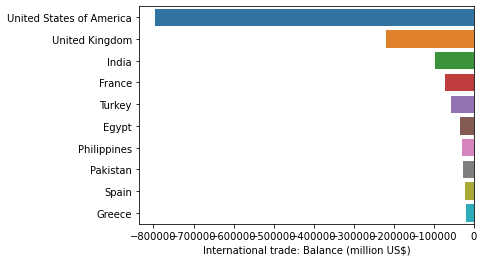

In [80]:
# for the international trade balance column
#to determine whether the top and bottom ten have any distinction
pt= raw_data4[['country',"International trade: Balance (million US$)"]].sort_values("International trade: Balance (million US$)", ascending = True).head(10) #sorting the countries in order
pt1 = sb.barplot(x="International trade: Balance (million US$)", y='country', data= pt)
pt1.set(xlabel = "International trade: Balance (million US$)", ylabel= '')



[Text(0.5, 0, 'International trade: Balance (million US$)'), Text(0, 0.5, '')]

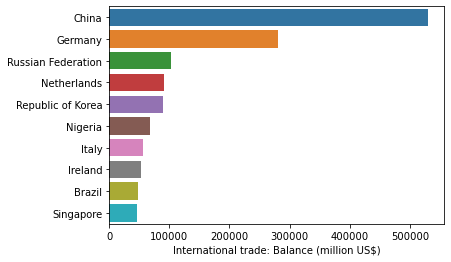

In [79]:
pt= raw_data4[['country',"International trade: Balance (million US$)"]].sort_values("International trade: Balance (million US$)", ascending = False).head(10) #sorting the countries in order
pt1 = sb.barplot(x="International trade: Balance (million US$)", y='country', data= pt)
pt1.set(xlabel = "International trade: Balance (million US$)", ylabel= '')

- There is no clear distinction for underdeveloped and developed countries using the indicator international trade as Singapore is in the top 10 for international trade: Balance while USA is in the bottom 10 despite both being developed countries

In [24]:
# creating a new column for healthexpenditure per capita
raw_data4["Health expenditure per capita"]=(raw_data4["Health: Total expenditure (% of GDP)"]*raw_data4["GDP per capita (current US$)"])/100
#dropping the previous columns and international trade column
drop2=["Health: Total expenditure (% of GDP)","International trade: Balance (million US$)"]
final_data= raw_data4.copy()
final_data.drop(drop2, axis=1, inplace=True)

In [25]:
#checking if columns have been dropped
final_data.head()

GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
0                         623.2                             23.3   
1                        3984.2                             22.4   
2                        4154.1                             12.2   
4                       39896.4                              0.5   
5                        4714.1                              6.8   

   Agricultural production index (2004-2006=100)  \
0                                            125   
1                                            134   
2                                            160   
4                                            115   
5                                            175   

   International trade: Exports (million US$)  \
0                                      1458.0   
1                                      1962.0   
2                                     29992.0   
4                                       100.0   
5                                     21011.0   

   International trade: Imports (million US$)  \
0                                      3568.0   
1                                      4669.0   
2                                     47091.0   
4                                      1355.0   
5                                      8790.0   

   Population growth rate (average annual %)  \
0                                        3.2   
1                                       -0.1   
2                                        2.0   
4                                       -1.6   
5                                        3.5   

   Urban population (% of total population)  \
0                                      26.7   
1                                      57.4   
2                                      70.7   
4                                      85.1   
5                                      44.1   

   Infant mortality rate (per 1000 live births  \
0                                         68.6   
1                                         14.6   
2                                         27.7   
4                                         18.0   
5                                         65.4   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              106.4     
2                                              113.0     
4                                               88.1     
5                                               60.8     

   Energy supply per capita (Gigajoules)      country          Region  \
0                                      5  Afghanistan    SouthernAsia   
1                                     36      Albania  SouthernEurope   
2                                     55      Algeria  NorthernAfrica   
4                                    119      Andorra  SouthernEurope   
5                                     25       Angola    MiddleAfrica   

   Average labour force participation  Average life expectancy  \
0                              51.450                   62.250   
1                              50.600                   77.750   
2                              43.850                   75.300   
4                              63.625                   72.725   
5                              68.450                   60.200   

   Average pop. using improved drinking water  \
0                                       62.60   
1                                       95.05   
2                                       83.05   
4                                      100.00   
5                                       51.80   

   Average Education: Primary gross enrol  Health expenditure per capita  
0                                  111.35                        51.1024  
1                                  113.60                       235.0678  
2                                  116.10                       299.0952  
4                                  102

***Determing if certain regions require greater financial aid than the other***

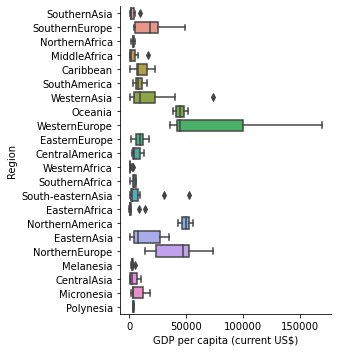

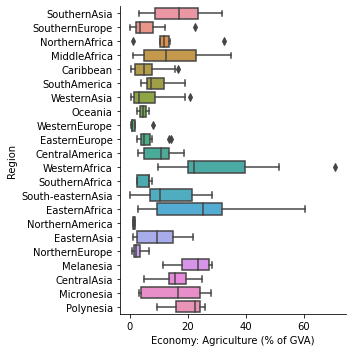

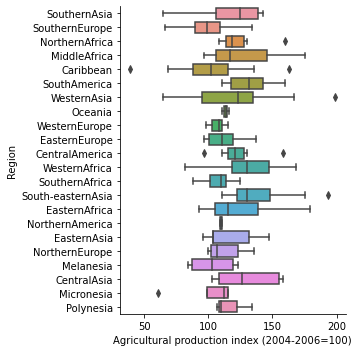

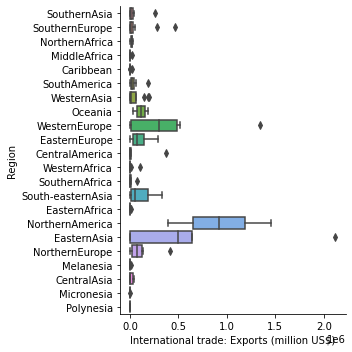

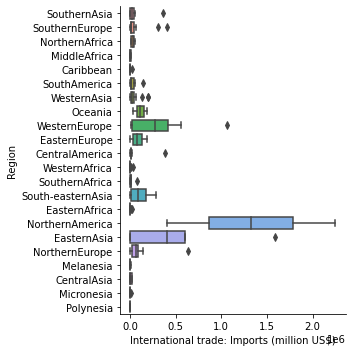

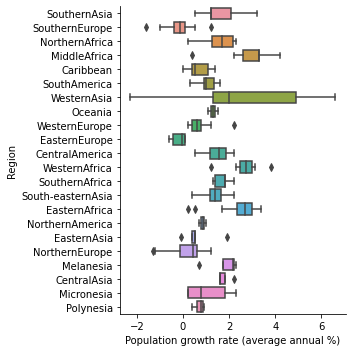

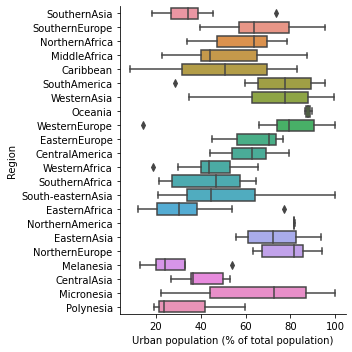

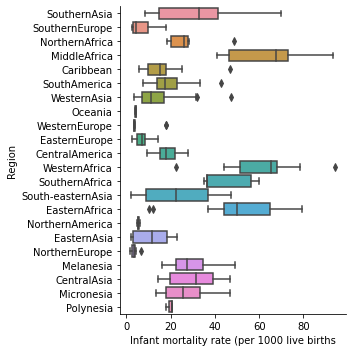

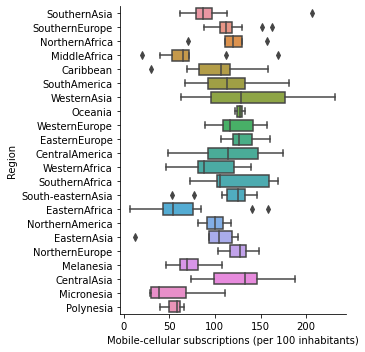

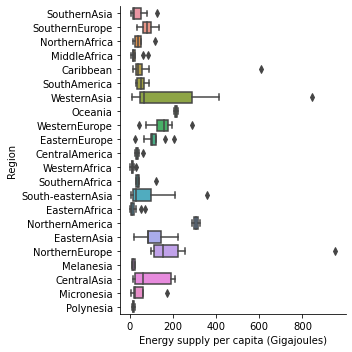

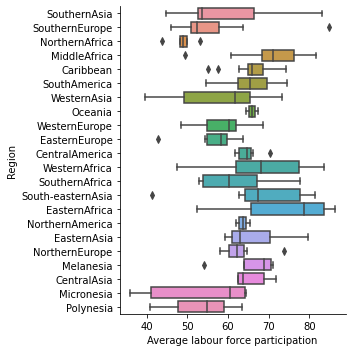

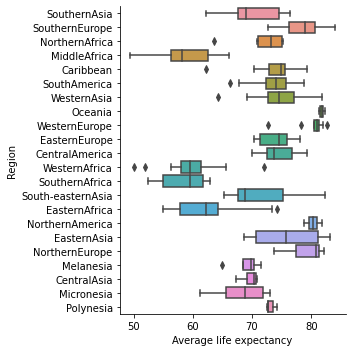

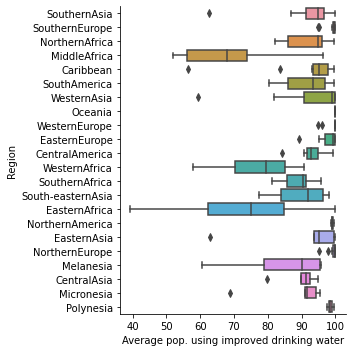

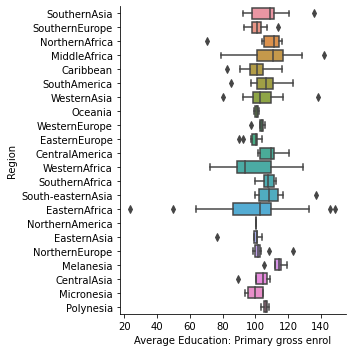

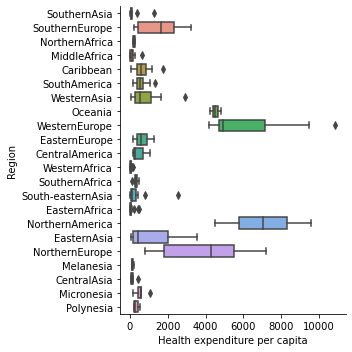

In [26]:
#Looking at catplots across various regions
temp_data=final_data.copy()
drop3=["country"]
temp_data.drop(drop3, axis=1, inplace=True)
temp_data1=temp_data.copy()
drop4=["Region"]
temp_data1.drop(drop4, axis=1, inplace=True)
f=temp_data1.columns
for i in f:
    sb.catplot(x=i, y="Region",kind="box", data=temp_data)


***Insights***  
There are clear differences in the distribution of each element for the different regions with some indicators having a greater disparity such as health expenditure per capita is much higher in northern america compared to the western asia. Some regions are generally poor performing across a few indicators such as middle africa hinting that these regions may require greater financial aid 

# Bivariate analysis
- Looking for relations between different elements 

<AxesSubplot:>

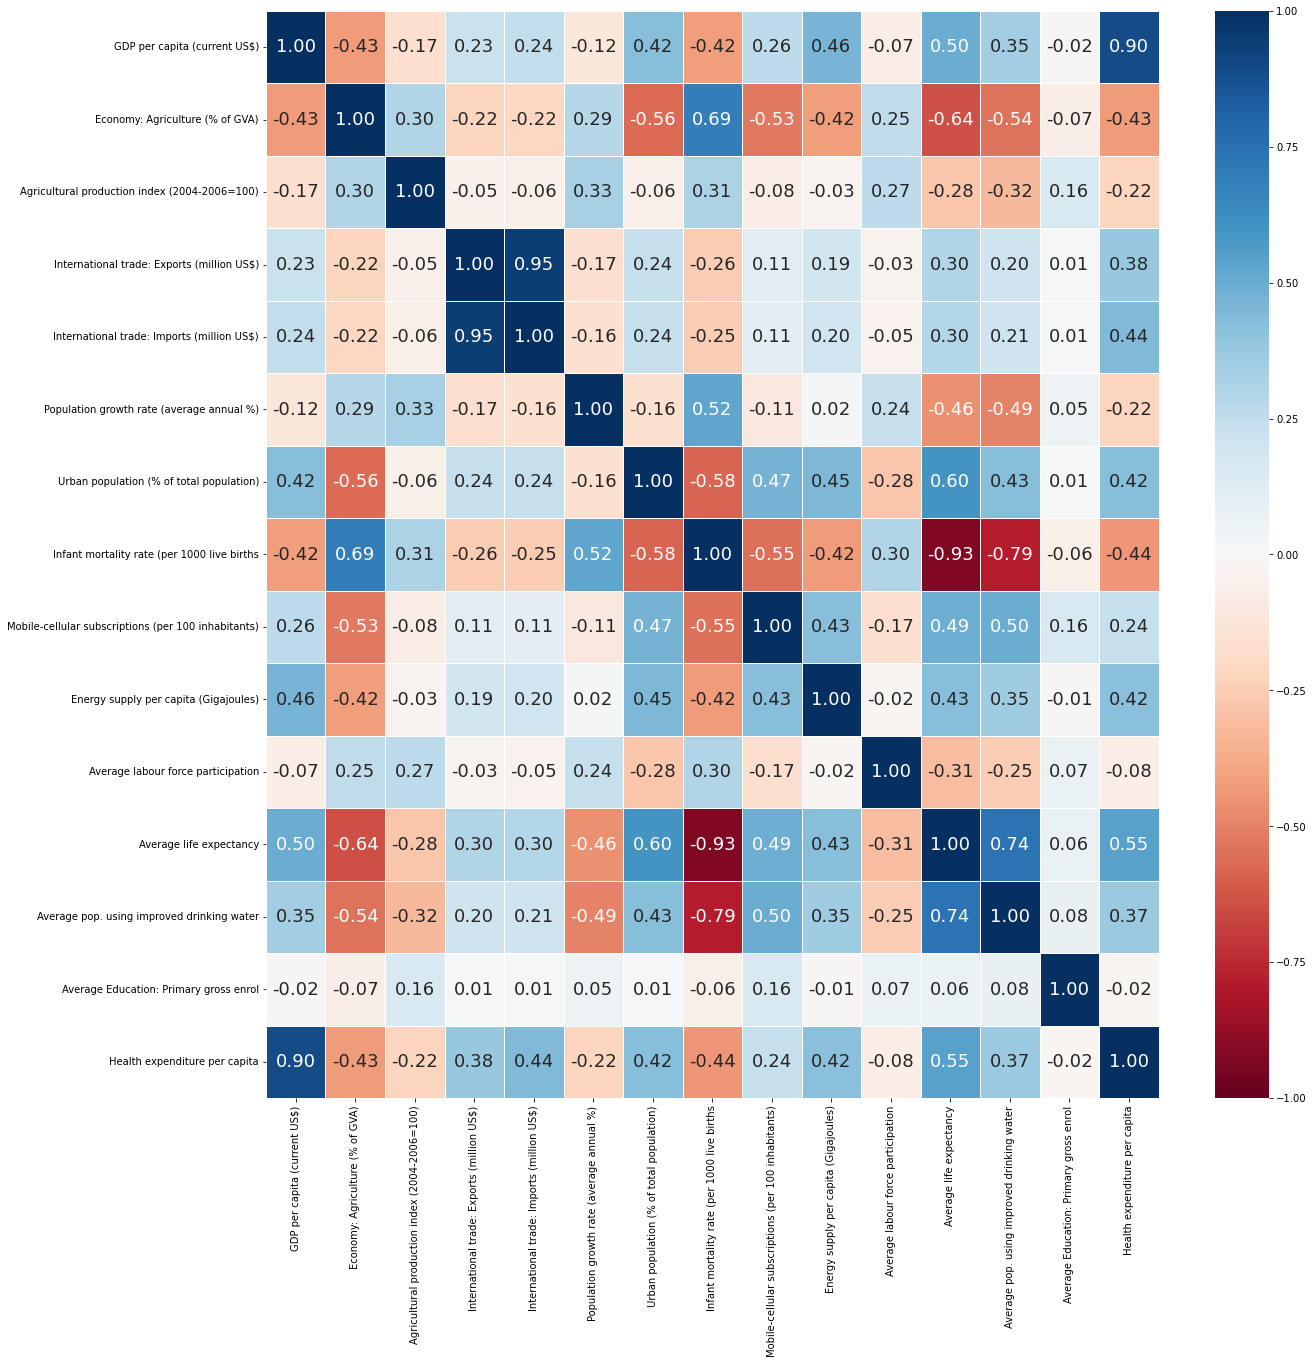

In [27]:
# examine the correlation matrix between the remaining and new columns
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(final_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

***Insights***  
- Most of the columns have average correlation with other columns except for average education: primary gross enrol that has no evident correlation
- Some columns are strongly correlated like GDP with health expenditure showing the relationship between the average income for an individual and the amount country spends on their health and infant mortality rate with pop using improved drinking water


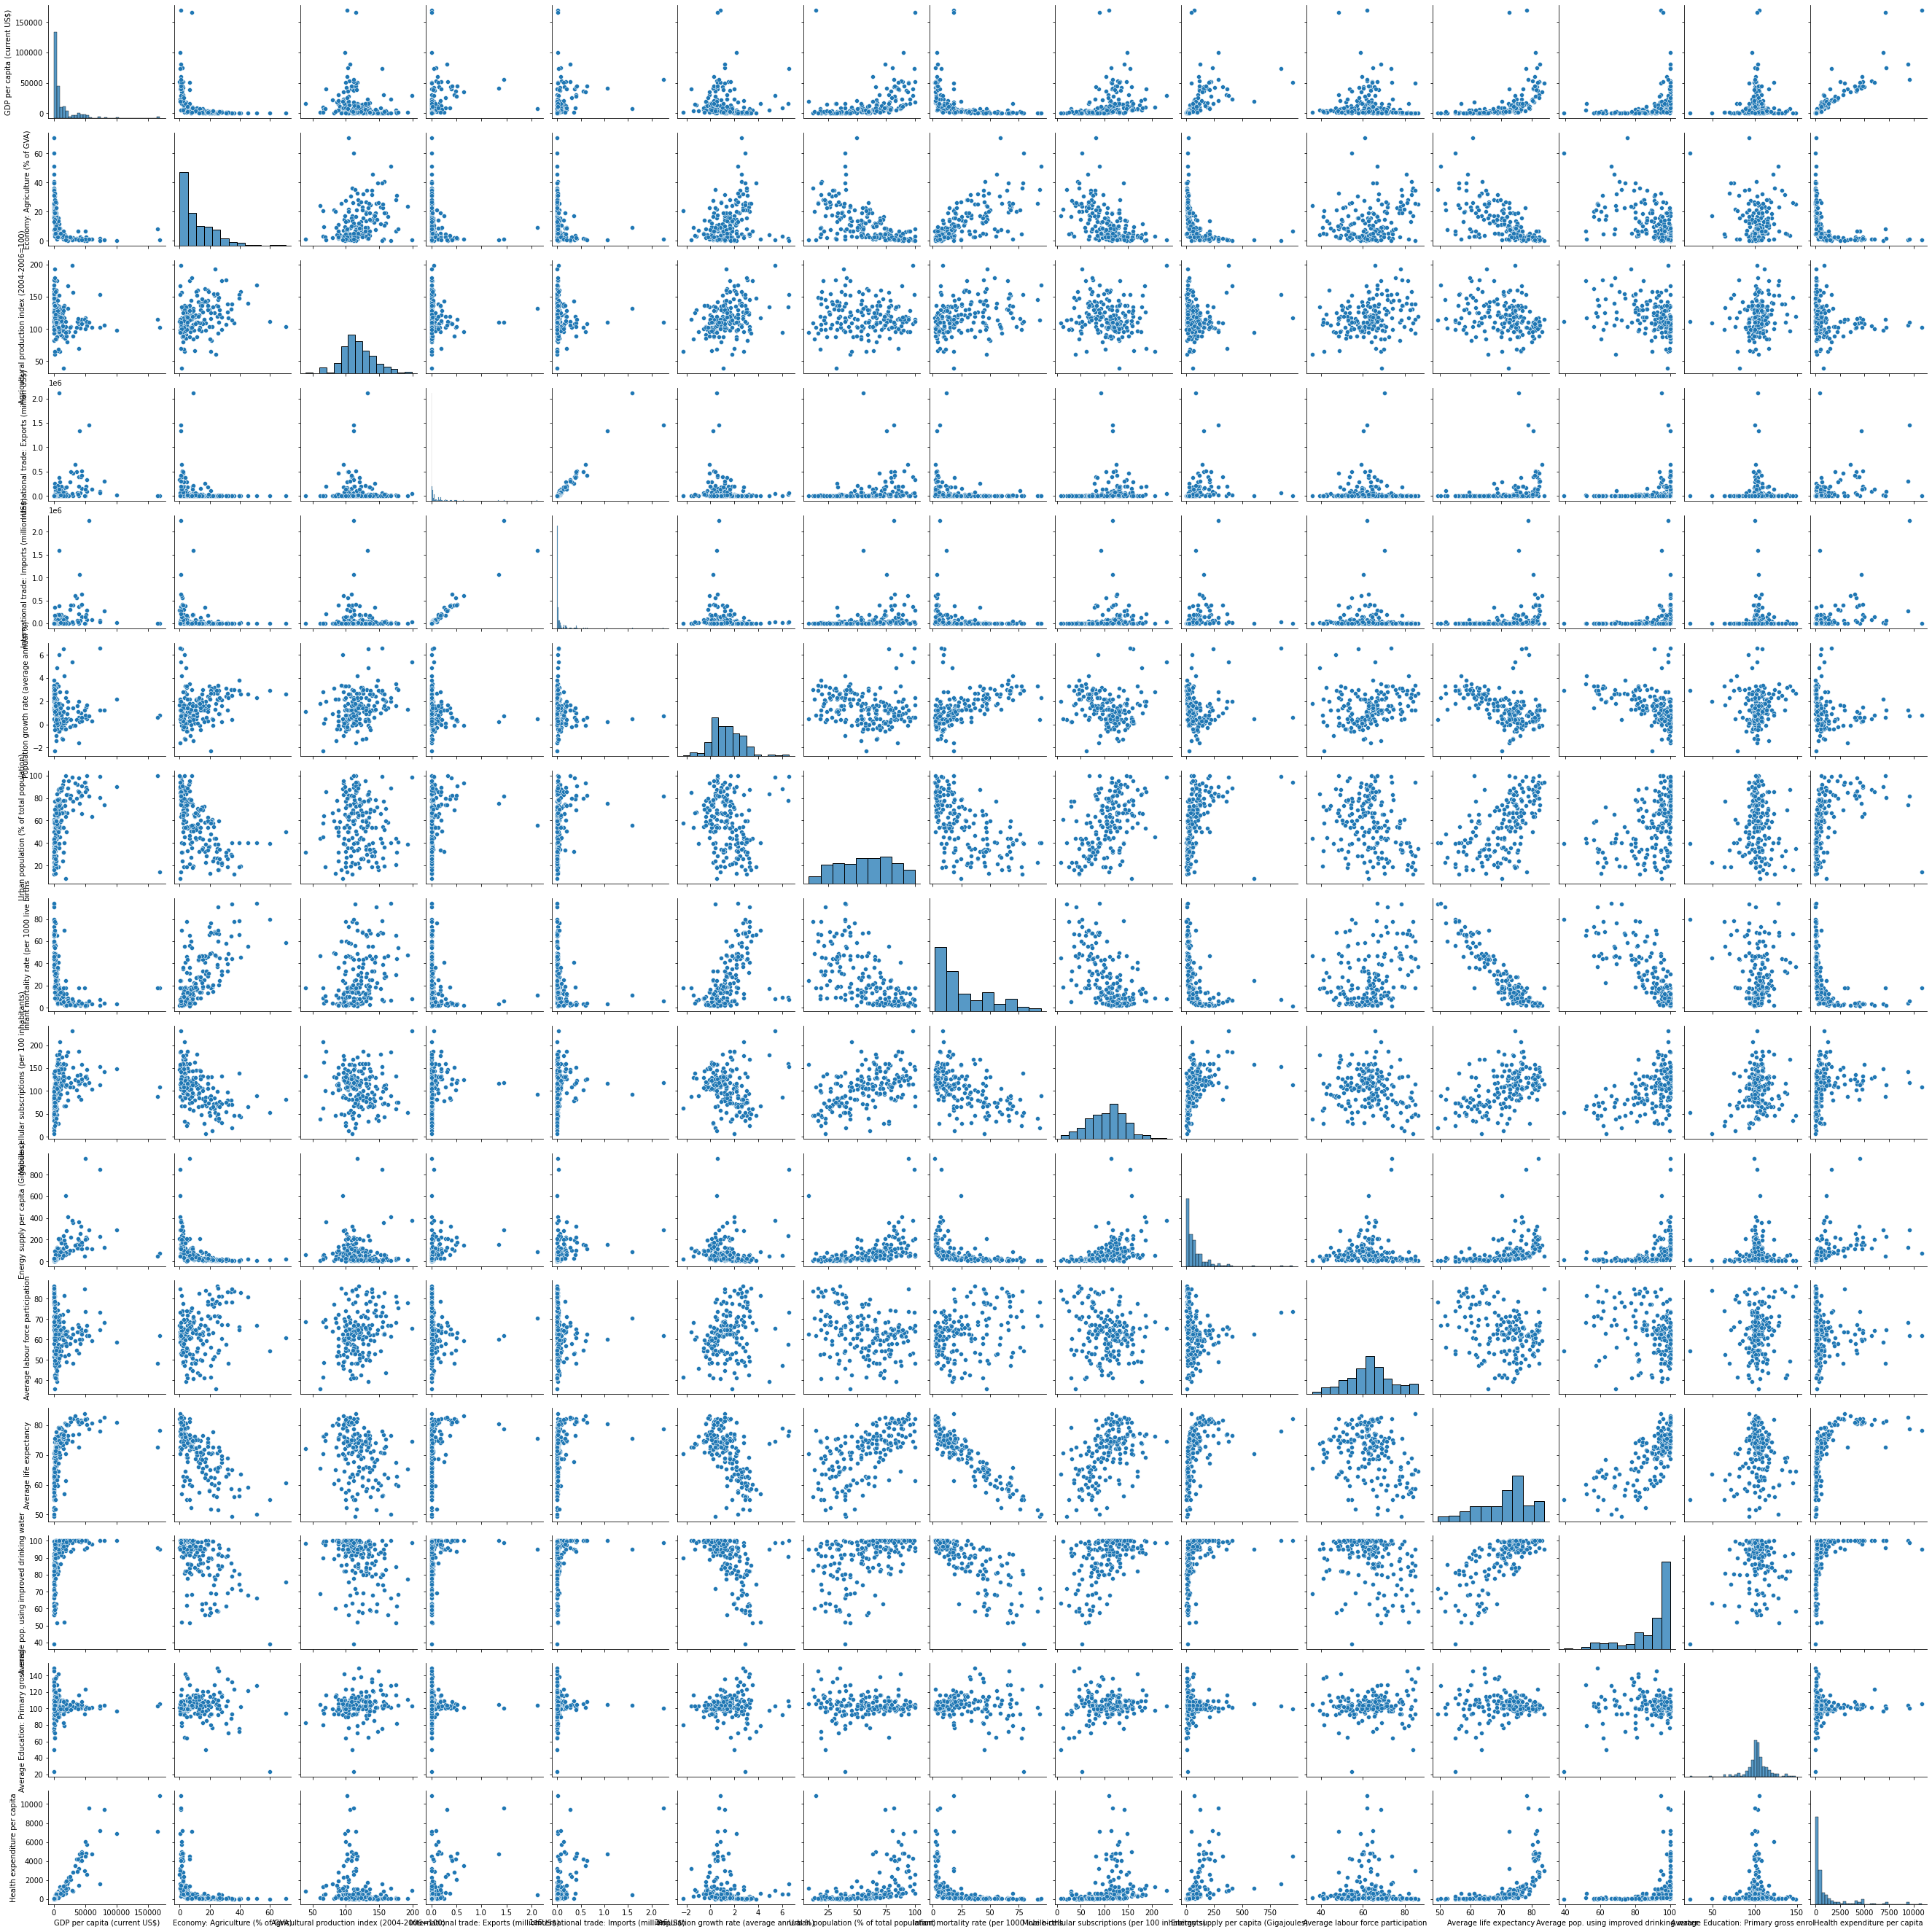

In [28]:
# using pair plots to have a clearer visual
sb.pairplot(data = final_data)

Certain columns have a vertical line due to one variables changing at a much faster pace than the others hence scaling is required

This clearly depicts the relationships between certain variables are negatively correlated such as economy: agriculture and health expenditure. 

***To provide more-in depth and clear analysis we can categorise the countries based on their gdp into 5 categories to compare how the income per capita(strong indicator for a company's need for financial aid as it is often used to differentiate between developed, developing and underdeveloped country) with other columns***

In [30]:
temp_data2=final_data.copy()
temp_data2.sort_values(by =['GDP per capita (current US$)'], inplace = True) #to arrange the countries from lowest gdp to highest gdp


In [31]:
# creating a new column that has the quantile ranks of the different countries 
temp_data2['GDP category']= pd.qcut(temp_data2['GDP per capita (current US$)'], q = 5, labels = False)

In [32]:
#checking if column is created
temp_data2.head()

GDP per capita (current US$)  Economy: Agriculture (% of GVA)  \
187                         144.5                             60.2   
33                          244.6                             36.3   
39                          333.2                             34.9   
147                         359.0                             39.6   
121                         372.9                             26.1   

     Agricultural production index (2004-2006=100)  \
187                                            112   
33                                             109   
39                                             114   
147                                            148   
121                                            149   

     International trade: Exports (million US$)  \
187                                       925.0   
33                                        123.0   
39                                        213.0   
147                                       927.0   
121                                       875.0   

     International trade: Imports (million US$)  \
187                                       530.0   
33                                        625.0   
39                                        147.0   
147                                      1861.0   
121                                      1649.0   

     Population growth rate (average annual %)  \
187                                        2.9   
33                                         3.0   
39                                         0.4   
147                                        3.8   
121                                        2.9   

     Urban population (% of total population)  \
187                                      39.6   
33                                       12.1   
39                                       40.0   
147                                      18.7   
121                                      16.3   

     Infant mortality rate (per 1000 live births  \
187                                         79.5   
33                                          77.8   
39                                          93.5   
147                                         65.8   
121                                         66.5   

     Mobile-cellular subscriptions (per 100 inhabitants)  \
187                                               52.5     
33                                                46.2     
39                                                20.4     
147                                               46.5     
121                                               35.3     

     Energy supply per capita (Gigajoules)                   country  \
187                                     12                   Somalia   
33                                       6                   Burundi   
39                                       5  Central African Republic   
147                                      5                     Niger   
121                                      6                    Malawi   

            Region  Average labour force participation  \
187  EasternAfrica                               54.60   
33   EasternAfrica                               83.65   
39    MiddleAfrica                               78.25   
147  WesternAfrica                               64.80   
121  EasternAfrica                               81.15   

     Average life expectancy  Average pop. using improved drinking water  \
187                    54.90                                       39.20   
33                     56.10                                       82.45   
39                     49.40                                       72.00   
147                    58.55                                       74.30   
121                    60.65                                       92.40   

     Average Education: Primary gross enrol  Health expenditure per capita  \
187                                  23.345               

***Through the new column we can see how the different categories fare in the different columns based on these indicators to see how strong the relation between GDP(general indicator of financial aid) is with the other factors***


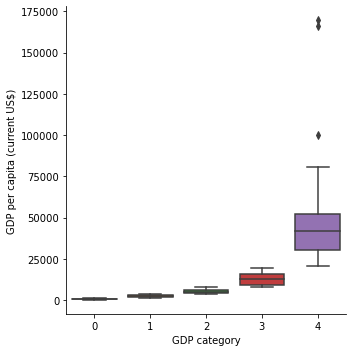

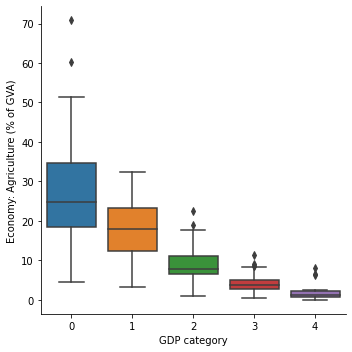

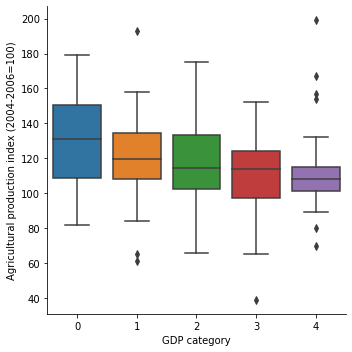

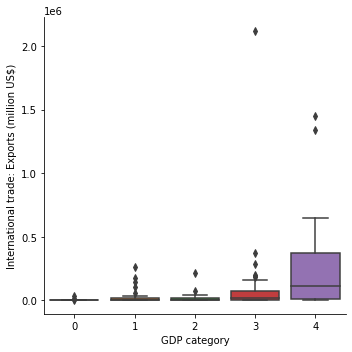

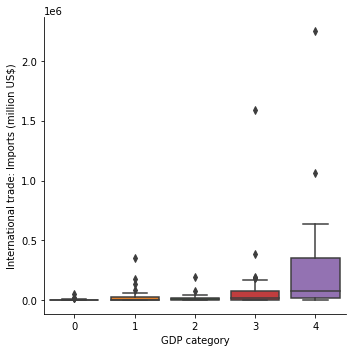

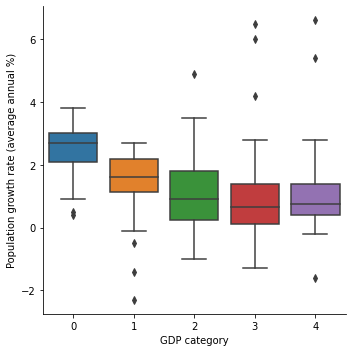

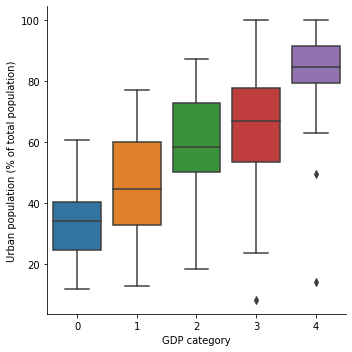

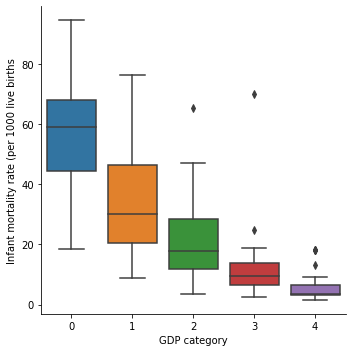

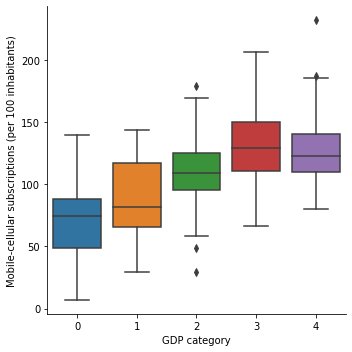

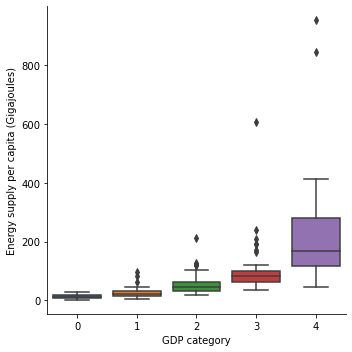

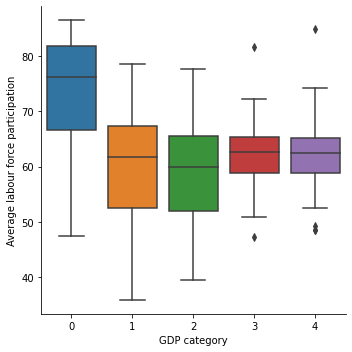

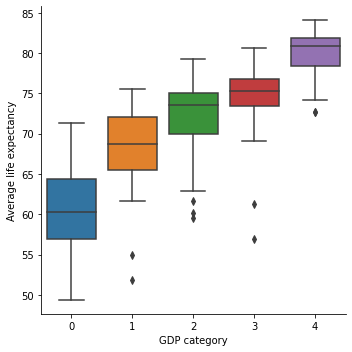

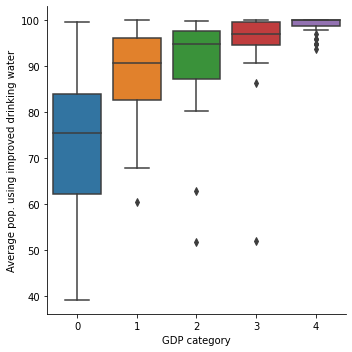

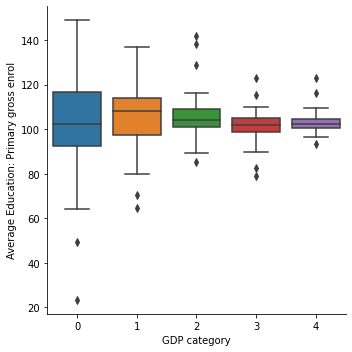

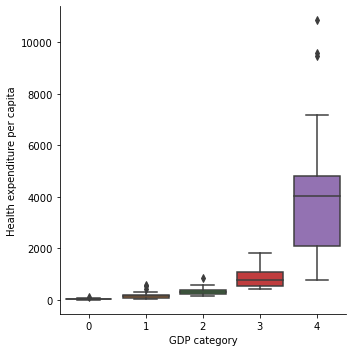

In [33]:

f=temp_data1.columns
for var in f:
  sb.catplot(y=var, x="GDP category",kind="box", data=temp_data2)

***Insights***  
- GDP is related to most of the columns hence showing how the different variables affected by different GDPs.  
- Columns like average education have a rather surprising trend with no clear distinction in terms of the distribution except category 1 which has large variance in terms of the value with the highest and lowest in 1 category.  

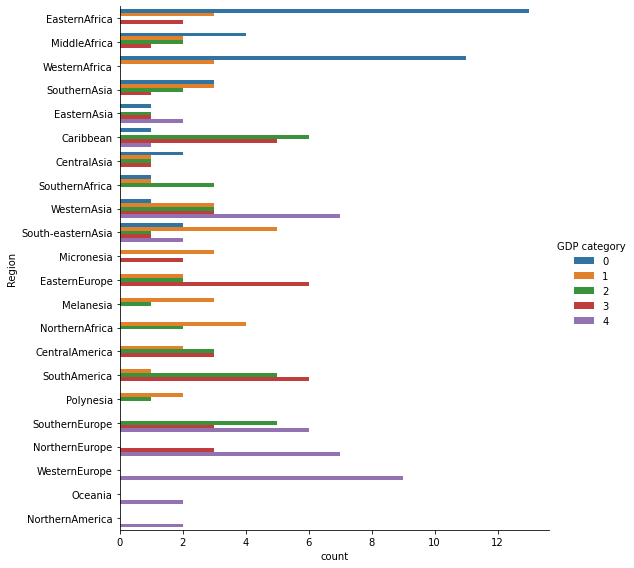

In [34]:
# General understanding of which regions might require help the most
sb.catplot(y = "Region", data = temp_data2, hue="GDP category", kind = "count", height = 8)

***Insights***  
- Regions like Ocenia, WesternEurope and NorthernAmerica consist of only countries in the highest GDP category indicating that these regions could require the least financial aid  
- Regions like Eastern Africa and western africa have the greatest number of countries in the lowest GDP category hence they could require greater financial aid


***Two dataframes***  
1) With the correlated columns removed
2) Without the correlated columns removed

In [38]:
#creating a seperate dataframe without highly correlated columns removed
temp1=clean_data.copy()
temp2=temp1.copy()
temp2.drop(col_drop, axis=1, inplace=True)
# combining labour force participation-male and female into one column
temp2["Average labour force participation"]=(temp2["Labour force participation (female/male pop. %)-female"]+
temp2["Labour force participation (female/male pop. %)-male"])/2
# combining Life expectancy at birth (females/males, years)-female and Life expectancy at birth (females/males, years)-male
temp2["Average life expectancy"]=(temp2["Life expectancy at birth (females/males, years)-female"]+
temp2["Life expectancy at birth (females/males, years)-male"])/2
# combining Pop. using improved drinking water (urban/rural, %)-Urban and Pop. using improved drinking water (urban/rural, %)-Rural
temp2["Average pop. using improved drinking water"]=(temp2["Pop. using improved drinking water (urban/rural, %)-Urban"]+temp2["Pop. using improved drinking water (urban/rural, %)-Rural"])/2
# combining Education: Primary gross enrol. ratio (f/m per 100 pop.)-female	and Education: Primary gross enrol. ratio (f/m per 100 pop.)-male
temp2["Average Education: Primary gross enrol"]=(temp2["Education: Primary gross enrol. ratio (f/m per 100 pop.)-female"]+
temp2["Education: Primary gross enrol. ratio (f/m per 100 pop.)-male"])/2
temp3=temp2.copy()
temp3.drop(drop, axis=1, inplace=True)
temp4=temp3.copy()
temp4.drop(col_to_drop, axis=1, inplace=True)
# creating a new column for healthexpenditure per capita
temp4["Health expenditure per capita"]=(temp4["Health: Total expenditure (% of GDP)"]*temp4["GDP per capita (current US$)"])/100
temp5=temp4.copy()
temp5.drop(drop2, axis=1, inplace=True)
final_data1=temp5.copy()


In [39]:
%store final_data #Correlated columns removed
%store final_data1 #Correlated columns not removed


Stored 'final_data' (DataFrame)
Stored 'final_data1' (DataFrame)
